# Churn Prediction Project using CRISP-DM Methodology

**Objective**: Predict customer churn to implement proactive retention strategies and improve customer loyalty.

## 1. Business Understanding
   - **Objective**: Gain a clear understanding of the project objectives and requirements from a business perspective.
   - **Tasks**:
     - Define the business problem: High customer churn rates lead to revenue loss.
     - Identify project goals: Develop a model to predict which customers are likely to churn.
     - Assess the situation: Review existing processes, resources, and constraints.
     - Define success criteria: Accuracy, precision, recall, and other relevant metrics.

## 2. Data Understanding
   - **Objective**: Collect and explore the data to become familiar with it and identify any data quality issues.
   - **Tasks**:
     - Data collection: Gather data from various sources such as transaction records, customer service interactions, and user behavior logs.
     - Data exploration: Perform exploratory data analysis (EDA) to understand data distributions, identify patterns, and detect anomalies.
     - Data visualization: Use visualizations to identify trends, correlations, and potential predictors of churn.
     - Data quality assessment: Identify and document any missing values, inconsistencies, and outliers.

## 3. Data Preparation
   - **Objective**: Prepare the data for modeling by cleaning and transforming it into a suitable format.
   - **Tasks**:
     - Data cleaning: Handle missing values, correct inconsistencies, and remove duplicates.
     - Feature selection: Identify relevant features that contribute to churn prediction.
     - Feature engineering: Create new features based on domain knowledge (e.g., customer tenure, average transaction value).
     - Data transformation: Normalize or standardize data, encode categorical variables, and split data into training and test sets.

## 4. Modeling
   - **Objective**: Develop predictive models to identify customers likely to churn.
   - **Tasks**:
     - Model selection: Choose appropriate algorithms (e.g., logistic regression, decision trees, random forest, neural networks).
     - Model training: Train models using the prepared data and fine-tune hyperparameters.
     - Model evaluation: Use cross-validation to evaluate model performance and avoid overfitting.
     - Model comparison: Compare different models based on performance metrics and select the best one.

## 5. Evaluation
   - **Objective**: Assess the performance of the selected model to ensure it meets business objectives.
   - **Tasks**:
     - Performance metrics: Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
     - Business evaluation: Ensure the model's predictions align with business goals and provide actionable insights.
     - Validation: Perform additional validation using a holdout sample or external data if available.
     - Documentation: Document the evaluation results and any limitations or assumptions.

## 6. Deployment
   - **Objective**: Implement the predictive model into the production environment and monitor its performance.
   - **Tasks**:
     - Deployment planning: Develop a deployment strategy, including integration with existing systems.
     - Model implementation: Work with engineers to deploy the model in a live environment.
     - Monitoring: Continuously monitor model performance and retrain as needed.
     - Maintenance: Update the model based on new data and evolving business requirements.


# Business Data Understanding

## Business Goals

The primary goal of this project is to increase the company's profit by reducing customer churn. To achieve this, we will develop a predictive model to identify customers who are likely to churn. By targeting these customers with specific marketing and promotional strategies, we aim to retain them and reduce churn rates.

## Strategy

1. **Predictive Modeling**: Create a robust predictive model to accurately identify customers who are at risk of churning.
2. **Targeted Marketing**: Develop and deploy targeted marketing campaigns and promotions to engage customers who are predicted to churn.
3. **Cost-Benefit Analysis**: Ensure that the projected cost of the marketing and retention efforts is lower than the projected profit gained from retaining these customers.

By focusing on these strategies, we aim to enhance customer retention and increase overall profitability for the bank.


# Data Understanding
## Data Description

This dataset contains information about customers of a bank, with various features that might influence their decision to leave the bank (churn). Below is a brief description of each feature in the dataset:

- **RowNumber**: Corresponds to the record (row) number and has no effect on the output.
- **CustomerId**: Contains random values and has no effect on customer leaving the bank.
- **Surname**: The surname of a customer has no impact on their decision to leave the bank.
- **CreditScore**: Can have an effect on customer churn, as customers with higher credit scores are less likely to leave the bank.
- **Geography**: A customer’s location can affect their decision to leave the bank.
- **Gender**: It’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age**: This is certainly relevant, as older customers are less likely to leave their bank than younger ones.
- **Tenure**: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**: A very good indicator of customer churn, as people with higher balances in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**: Refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**: Denotes whether or not a customer has a credit card. This column is relevant, as people with a credit card are less likely to leave the bank.
- **IsActiveMember**: Active customers are less likely to leave the bank.
- **EstimatedSalary**: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**: Whether or not the customer left the bank.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('artifacts/Churn_Modelling.csv')

### General Overview of the Data

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Simplifying column names and bringing consistency
df.columns = [name.lower() for name in list(df.columns)]
df.drop(['rownumber','customerid','surname'],axis=1,inplace=True)
df.rename(columns={"exited": "churn"}, inplace=True)


In [8]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### a. Data Types and Missing Values

In [9]:
# Checking the missing values
df.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
churn              0
dtype: int64

Each column has a count of 0 for missing values, indicating that our dataset is complete. This is advantageous as it allows us to proceed with the analysis and modeling without the need for imputation or data cleaning steps related to missing values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  churn            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


All columns in the dataset have been assigned appropriate data types based on their content and intended use. Since there are no discrepancies in data types and all columns contain valid data types for their respective contents, we can confidently proceed with further data analysis and model development tasks.

### b. Basic Descriptive Statistics

In [11]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000




- **Credit Score Distribution**:
  - The average credit score is 650.53, with a standard deviation of 96.65, indicating a wide range of credit scores among the customers.
  - The minimum credit score is 350, and the maximum is 850, showing the spectrum from poor to excellent credit scores.

- **Age and Tenure**:
  - The average age of customers is 38.92 years, with a standard deviation of 10.49 years.
  - The average tenure with the bank is approximately 5 years, with a standard deviation of 2.89 years.

- **Balance and Products**:
  - The average balance in customer accounts is $76,485.89.
  - The number of products held by customers averages 1.53, with most customers having between 1 and 2 products.

- **Customer Activity and Churn**:
  - About 70.55% of customers have a credit card, and 51.51% are active members.
  - The churn rate is 20.37%, meaning about 1 in 5 customers leave the bank.


### Univariate Analysis

In [12]:
df['churn'].value_counts()/len(df['churn'])

0    0.7963
1    0.2037
Name: churn, dtype: float64

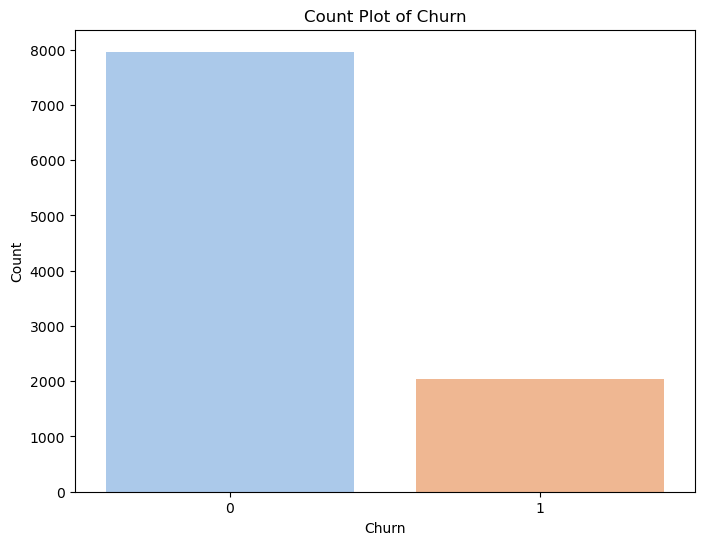

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='churn',palette='pastel')
plt.title('Count Plot of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

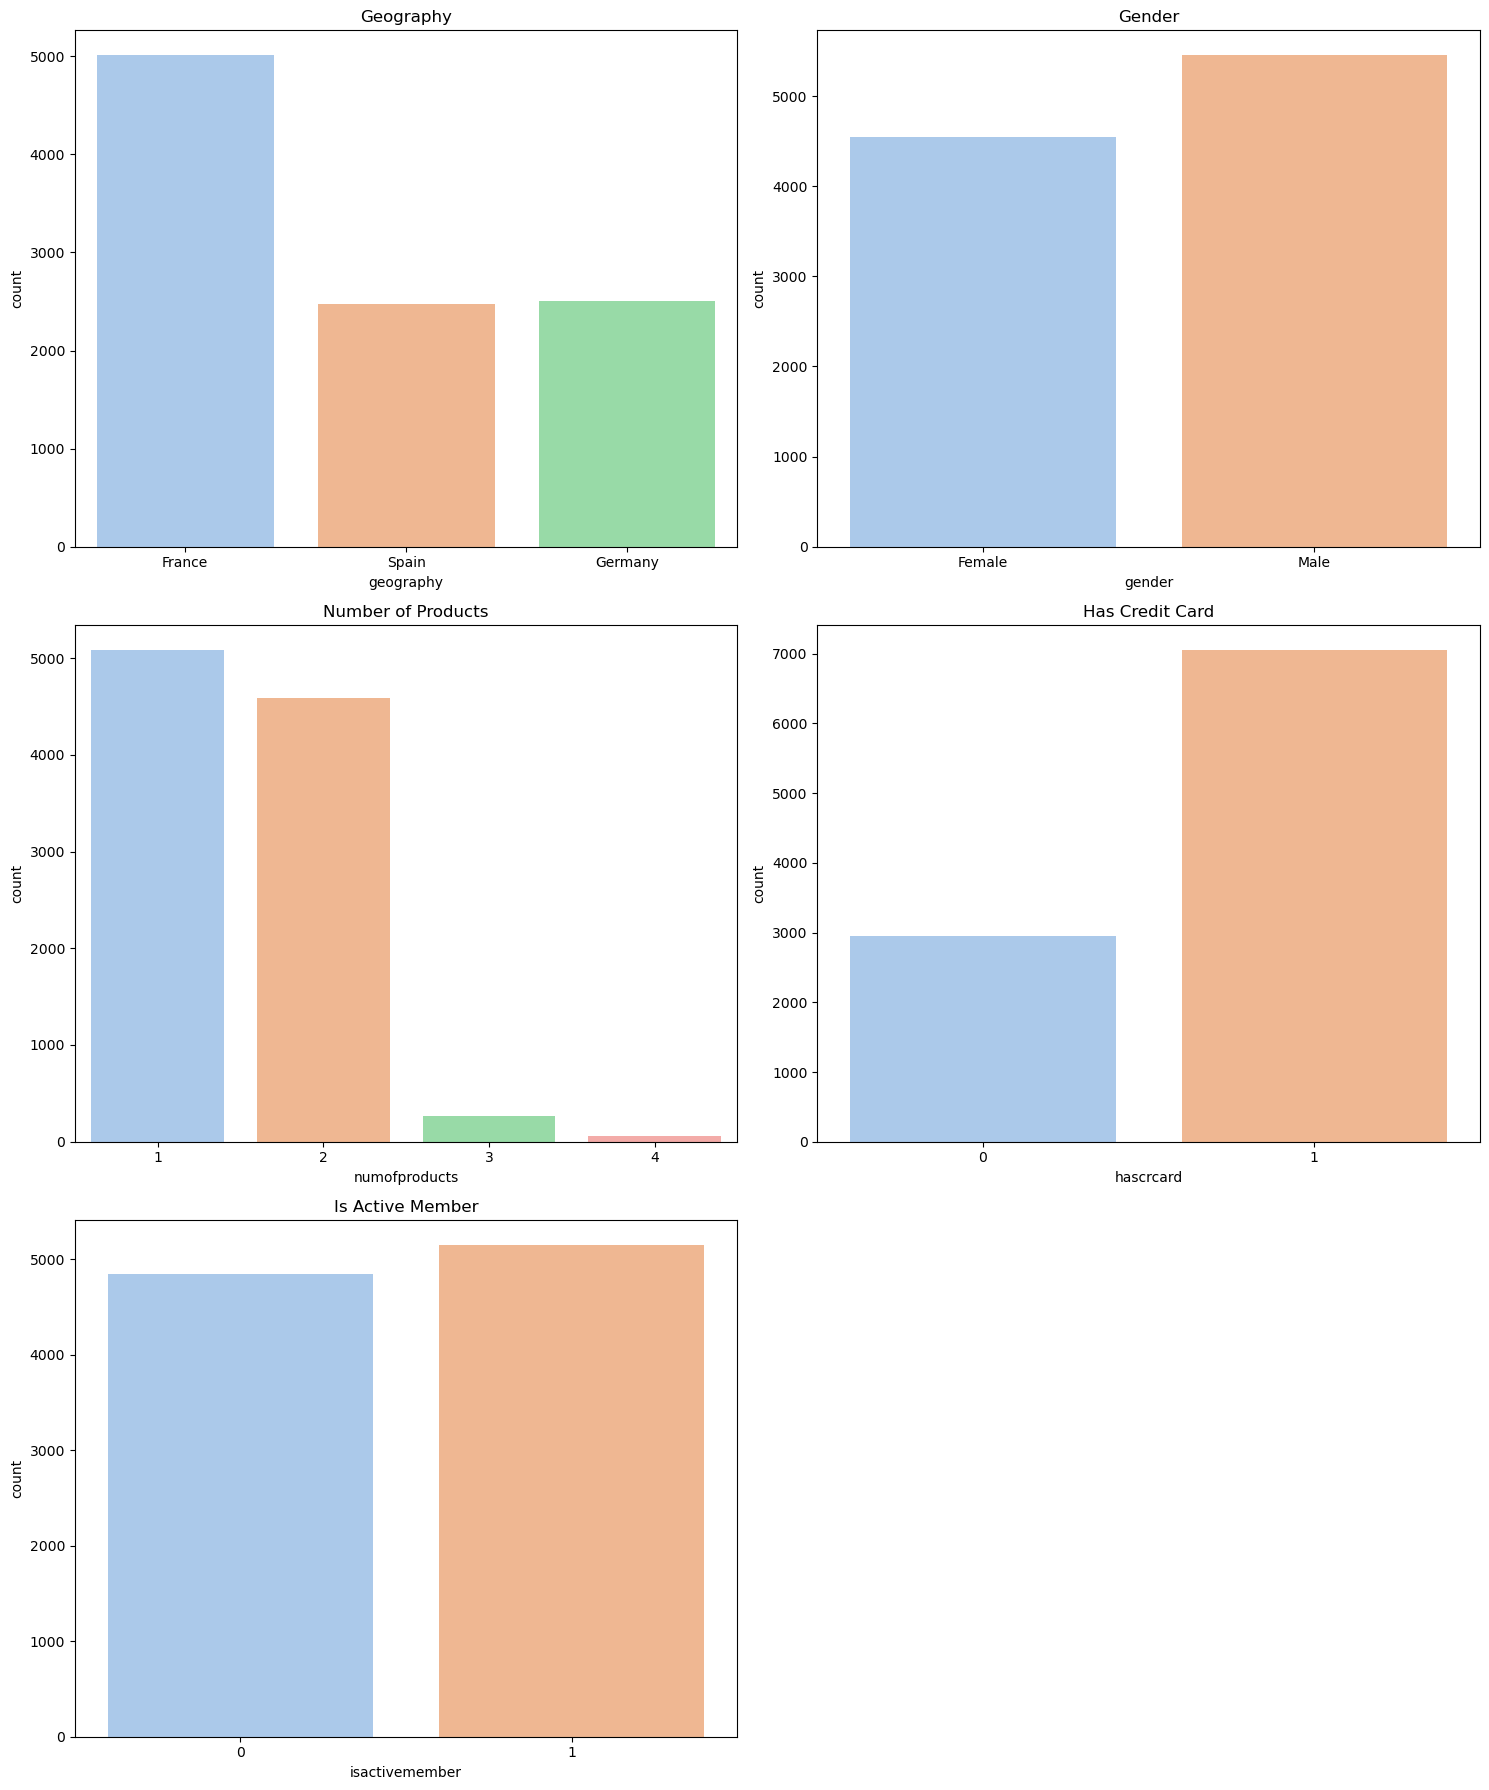

In [14]:
# Creating subplots in a 2-column layout
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Geography
sns.countplot(x='geography', data=df, ax=axs[0, 0], palette='pastel')
axs[0, 0].set_title('Geography')

# Gender
sns.countplot(x='gender', data=df, ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title('Gender')

# Number of Products
sns.countplot(x='numofproducts', data=df, ax=axs[1, 0], palette='pastel')
axs[1, 0].set_title('Number of Products')

# Has Credit Card
sns.countplot(x='hascrcard', data=df, ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title('Has Credit Card')

# Is Active Member
sns.countplot(x='isactivemember', data=df, ax=axs[2, 0], palette='pastel')
axs[2, 0].set_title('Is Active Member')

# Removing the empty subplot (bottom right)
fig.delaxes(axs[2, 1])

# Display the plots
plt.tight_layout()
plt.show()

##### Geography
- **France**: The largest number of customers are from France, indicating a significant customer base in this country.
- **Spain and Germany**: The number of spain and germany customers is roughly equal, suggesting a balanced geography distribution among the customers.

##### Gender
- **Male and Female**: The number of male and female customers is roughly equal, suggesting a balanced gender distribution among the customers.

##### Number of Products
- **1 Product**: Most customers have only one product.
- **2 Products**: A significant portion of customers have two products, making this the second most common category.
- **3 and 4 Products**: Very few customers have three or four products, indicating that most customers do not have multiple products with the bank.

##### Has Credit Card
- **No Credit Card**: A substantial number of customers do not have a credit card.
- **Has Credit Card**: The majority of customers have a credit card, suggesting that credit card ownership is common among the customer base.

##### Is Active Member
- **Active and Inactive Member**: The number of active and inactive members is roughly equal, suggesting a balanced member type distribution among the customers.


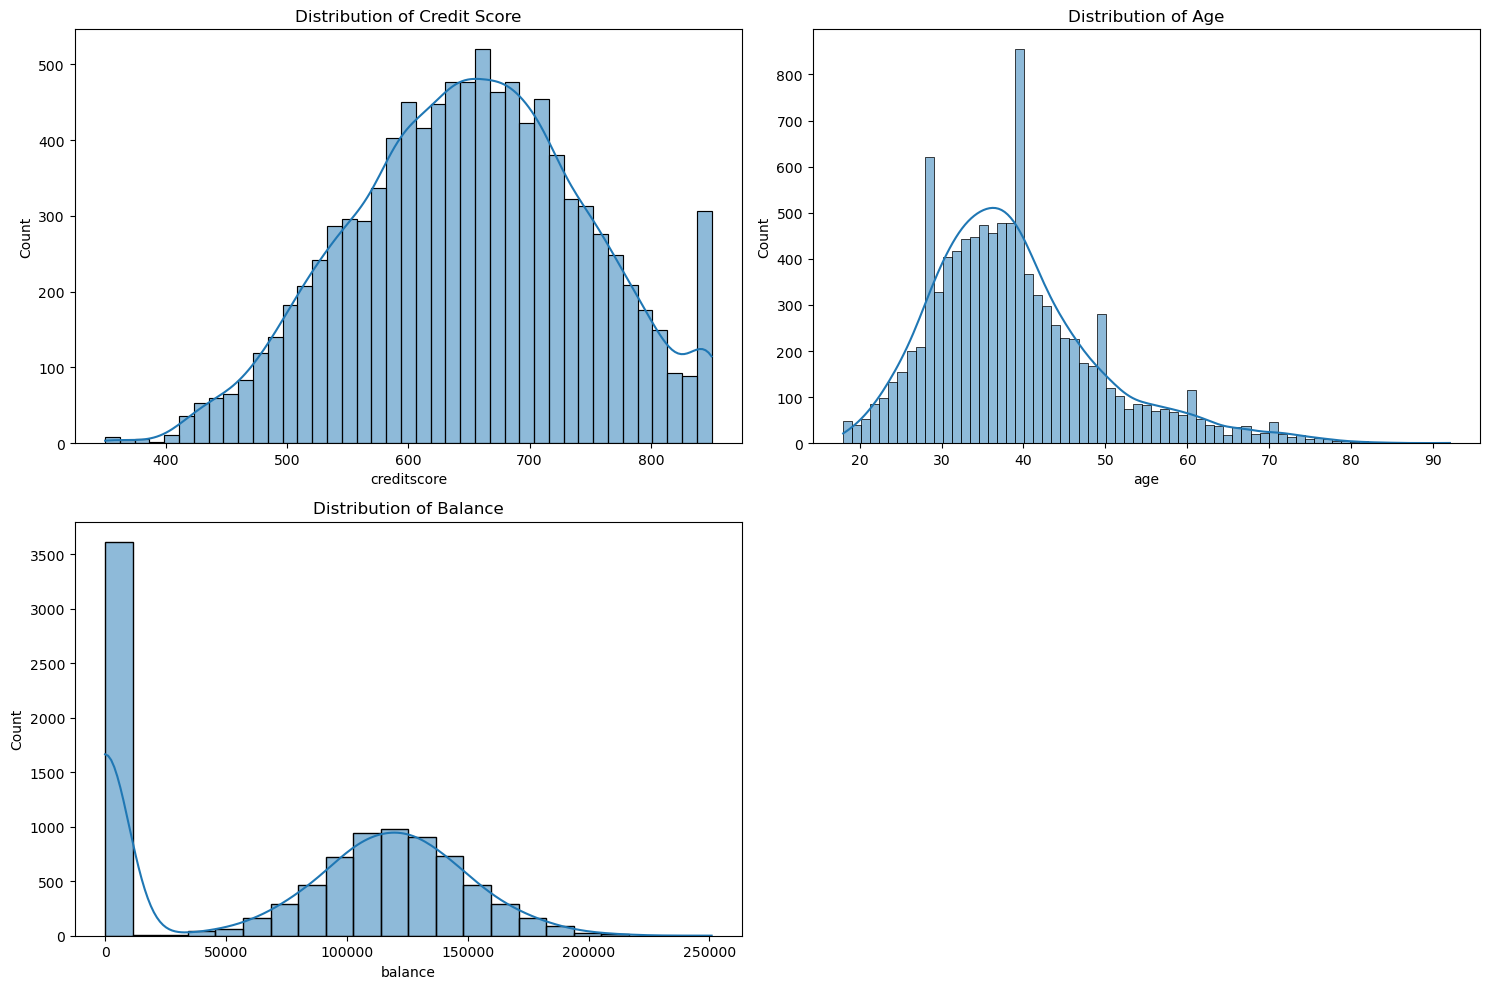

In [15]:
# Creating subplots in a 2-column layout
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of CreditScore
sns.histplot(df['creditscore'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Credit Score')

# Distribution of Age
sns.histplot(df['age'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Age')

# Distribution of Balance
sns.histplot(df['balance'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Balance')

# Removing the empty subplot (bottom right)
fig.delaxes(axs[1, 1])

# Display the plots
plt.tight_layout()
plt.show()



##### Distribution of Credit Score
- The distribution of credit scores appears to be approximately normal with a slight skew towards higher scores.
- The majority of credit scores lie between 500 and 800, with the peak around 650-700.
- There are very few customers with credit scores below 400 or above 850, indicating that most customers have moderate to good credit scores.

##### Distribution of Age
- The age distribution shows a concentration of customers in their 30s and 40s.
- There are notable peaks around the ages of 30 and 40, possibly indicating key age groups that the bank serves.
- There is a gradual decline in the number of customers as age increases beyond 50, with very few customers over the age of 70.

##### Distribution of Balance
- The balance distribution is heavily right-skewed, with a large number of customers having a balance close to zero.
- There are significant peaks around $100,000  and $150,000, indicating common balance ranges among the customers.
- A substantial number of customers have very high balances, but these are fewer in number compared to those with lower balances.


### Bivariate Analysis

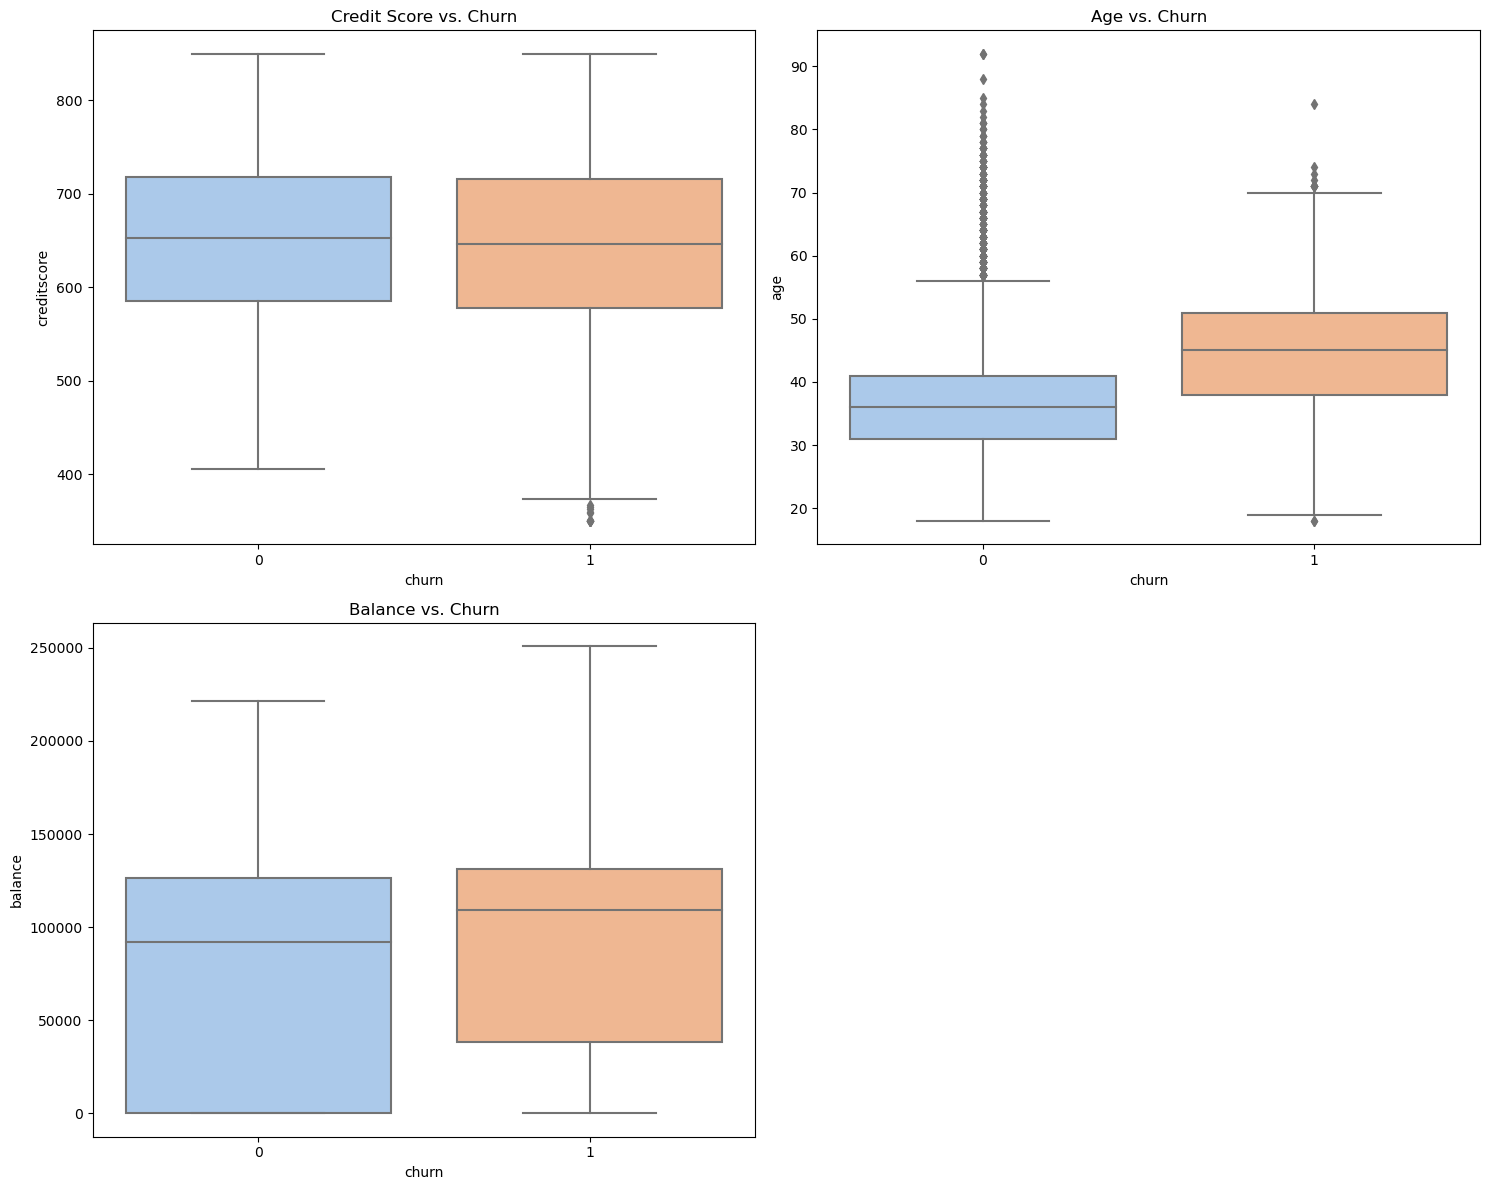

In [16]:
# Creating subplots in a 2-column layout
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Credit Score vs. Churn
sns.boxplot(x='churn', y='creditscore', data=df, ax=axs[0, 0],palette='pastel')
axs[0, 0].set_title('Credit Score vs. Churn')

# Age vs. Churn
sns.boxplot(x='churn', y='age', data=df, ax=axs[0, 1],palette='pastel')
axs[0, 1].set_title('Age vs. Churn')

# Balance vs. Churn
sns.boxplot(x='churn', y='balance', data=df, ax=axs[1, 0],palette='pastel')
axs[1, 0].set_title('Balance vs. Churn')

# Removing the empty subplot (bottom right)
fig.delaxes(axs[1, 1])

# Display the plots
plt.tight_layout()
plt.show()

# Insights from Box Plots of Credit Score, Age, Balance vs. Churn

##### Credit Score vs. Churn
- There is considerable overlap in the interquartile ranges of both groups, suggesting that credit score alone may not be a strong indicator of churn.
- The spread of credit scores is similar for both groups, but there are more outliers with lower credit scores in the non-churn group.

##### Age vs. Churn
- The median age of customers who churn is higher compared to those who do not churn.
- The interquartile range for both groups shows a significant overlap, but there are more older customers in the churn group, indicating that age could be a contributing factor.
- There are more outliers on the higher age side for the not churn group.

##### Balance vs. Churn
- The median balance is higher for customers who churn compared to those who do not churn.
- There is a significant overlap in the interquartile ranges, but the churn group has a higher range of balances.
- Customers with very high balances are more represented in the churn group, indicating that higher balances may be associated with a higher likelihood of churn.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


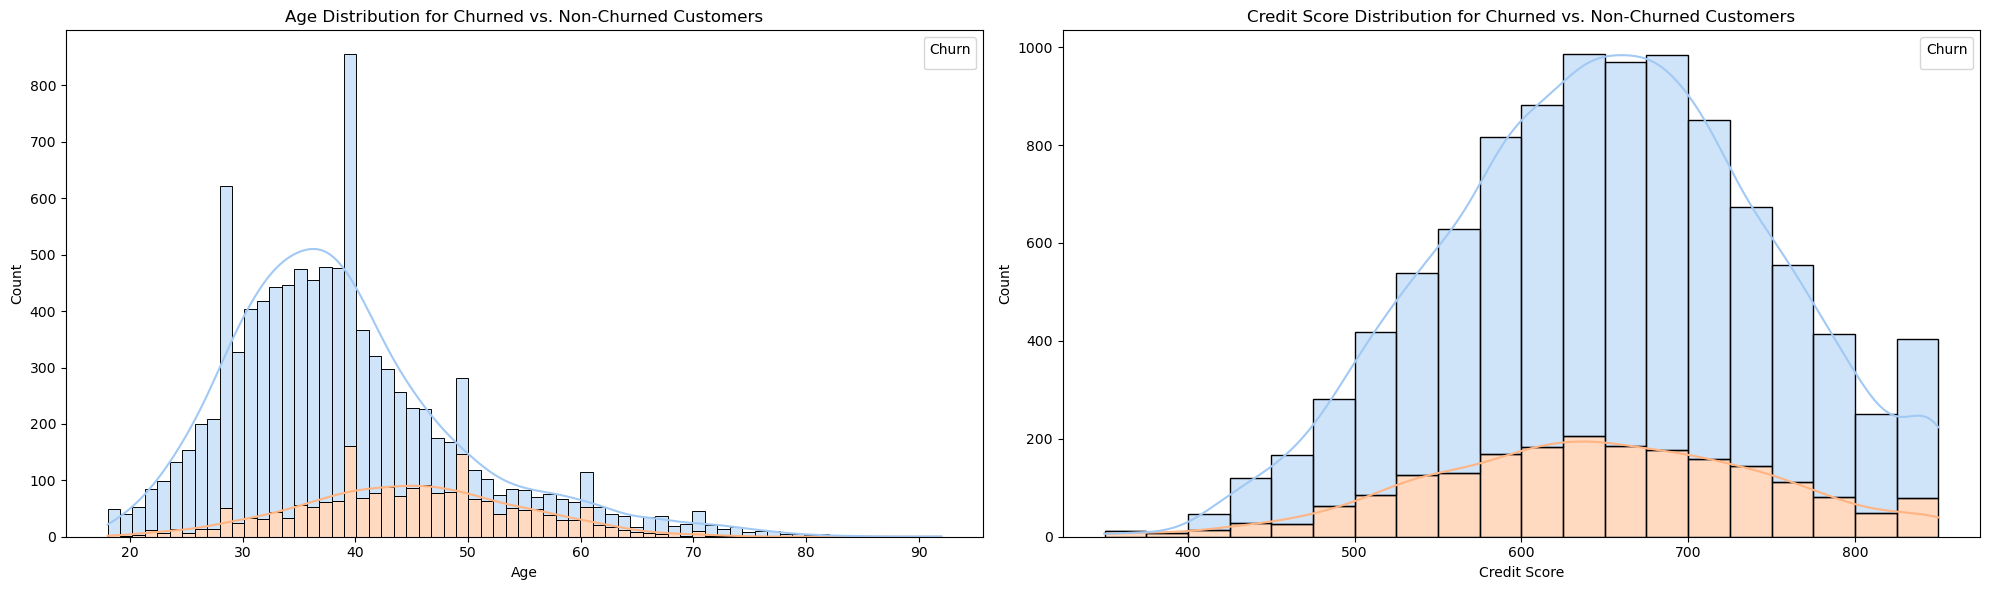

In [17]:
# Create subplots with 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot 1: Age Distribution for Churned vs. Non-Churned Customers
sns.histplot(data=df, x='age', hue='churn', multiple='stack', palette='pastel', kde=True, ax=axes[0])
axes[0].set_title('Age Distribution for Churned vs. Non-Churned Customers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend(title='Churn', loc='upper right')

# Plot 2: Credit Score Distribution for Churned vs. Non-Churned Customers
sns.histplot(data=df, x='creditscore', hue='churn', multiple='stack', palette='pastel', kde=True, binwidth=25, ax=axes[1])
axes[1].set_title('Credit Score Distribution for Churned vs. Non-Churned Customers')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churn', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

#### Age Distribution for Churned vs. Non-Churned Customers

- **Age Range 40-65**: 
  - There is a noticeable increase in the churn rate among customers aged between 40 and 65.
  - The distribution shows that a significant number of customers in this age range have churned compared to younger and older age groups.

- **Overall Trend**:
  - Younger customers (under 40) and older customers (over 65) have lower churn rates.
  - The highest churn rates are observed in the 40-50 age group.

#### Credit Score Distribution for Churned vs. Non-Churned Customers

- **Credit Score Below 450**:
  - Customers with a credit score below 450 have a higher churn rate.
  - The distribution shows a distinct separation, with churned customers (orange) making up a larger proportion of the population with low credit scores.

- **Overall Trend**:
  - As the credit score increases, the proportion of churned customers decreases.
  - Non-churned customers (blue) dominate the higher credit score ranges.

These insights can be crucial for developing targeted strategies to reduce customer churn by focusing on specific age groups and credit score ranges.


### Categorical Analysis

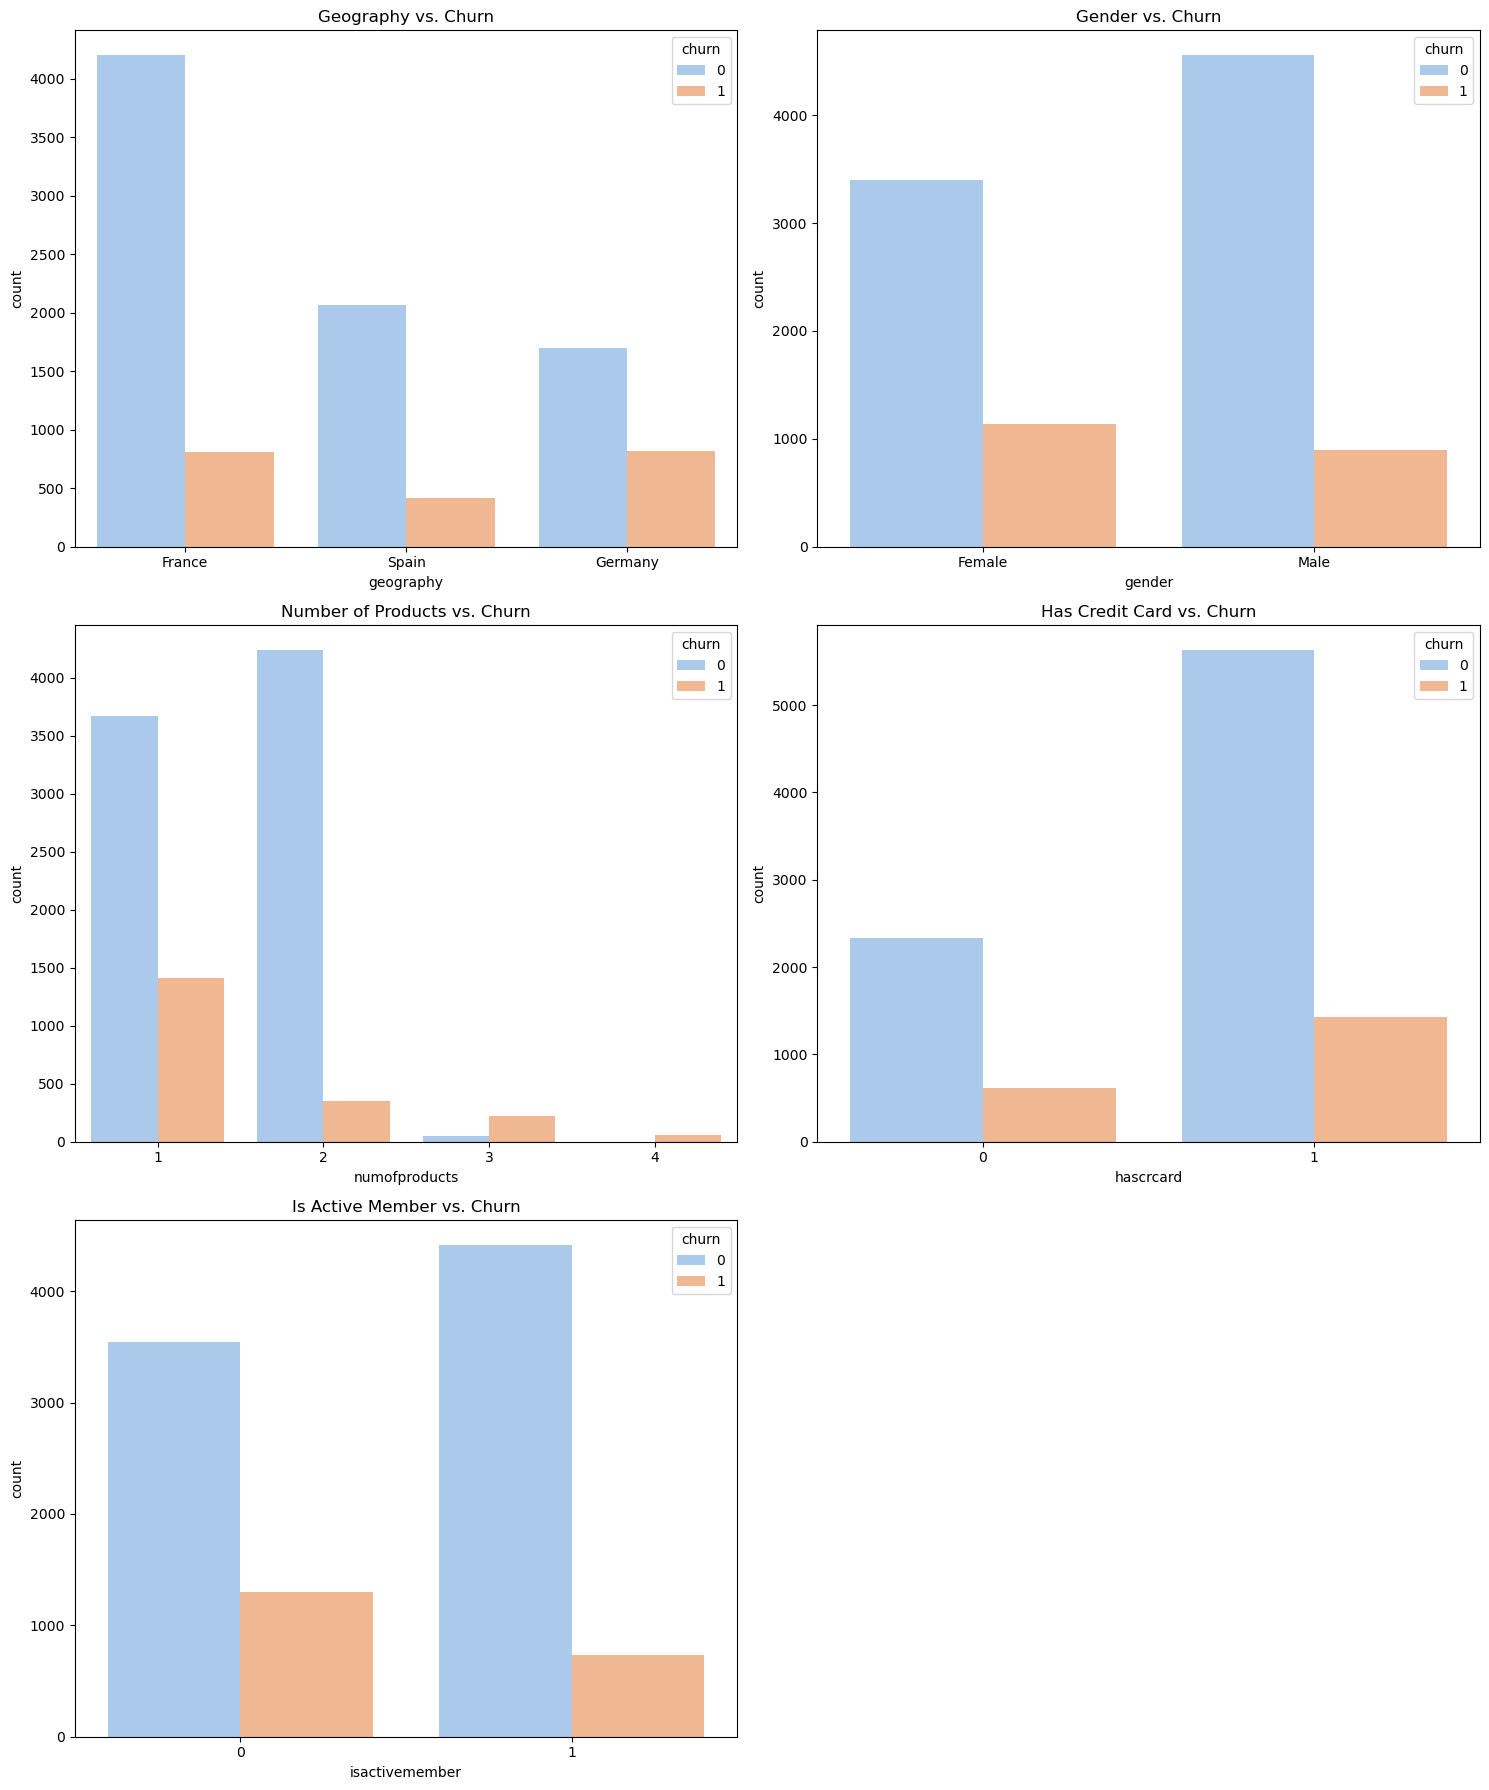

In [18]:
# Creating subplots in a 2-column layout
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Geography vs. Churn
sns.countplot(x='geography', hue='churn', data=df, ax=axs[0, 0], palette='pastel')
axs[0, 0].set_title('Geography vs. Churn')

# Gender vs. Churn
sns.countplot(x='gender', hue='churn', data=df, ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title('Gender vs. Churn')

# Number of Products vs. Churn
sns.countplot(x='numofproducts', hue='churn', data=df, ax=axs[1, 0], palette='pastel')
axs[1, 0].set_title('Number of Products vs. Churn')

# Has Credit Card vs. Churn
sns.countplot(x='hascrcard', hue='churn', data=df, ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title('Has Credit Card vs. Churn')

# Is Active Member vs. Churn
sns.countplot(x='isactivemember', hue='churn', data=df, ax=axs[2, 0], palette='pastel')
axs[2, 0].set_title('Is Active Member vs. Churn')

# Removing the empty subplot (bottom right)
fig.delaxes(axs[2, 1])

# Display the plots
plt.tight_layout()
plt.show()

In [19]:
df.groupby('hascrcard')['churn'].mean()

hascrcard
0    0.208149
1    0.201843
Name: churn, dtype: float64

In [20]:
df.groupby('isactivemember')['churn'].mean()

isactivemember
0    0.268509
1    0.142691
Name: churn, dtype: float64

##### Geography vs. Churn
- **France**:
  - The churn rate in France appears to be relatively low compared to the number of non-churning customers.

- **Spain**:
  - The churn rate in Spain is relatively low, similar to France.

- **Germany**:
  - The churn rate in Germany is higher compared to France and Spain, suggesting potential issues that might be specific to the German market.

##### Gender vs. Churn
- **Female**:
  - The churn rate among female customers is higher compared to male customers.

- **Male**:
  - The churn rate among male customers is lower compared to female customers.
  
##### Number of Products vs. Churn
- **1 Product**: Customers with 1 product have a higher churn rate compared to those with more products. This suggests that having only one product may not be enough to retain customers.
- **2 Products**: The majority of customers have 2 products, and they exhibit a lower churn rate compared to those with only 1 product.
- **3 and 4 Products**: Very few customers have 3 or 4 products, and the churn rates for these groups are not significant enough to draw conclusions. However, customers with more products tend to churn more, even all of the customers that have 4 products, all churned.

##### Has Credit Card vs. Churn
- **No Credit Card and Has Credit Card**: Customers without a credit card and with a credit card have a similar churn rate.

##### Is Active Member vs. Churn
- **Inactive Members**: Inactive members have a significantly higher churn rate compared to active members.
- **Active Members**: Active members show a much lower churn rate, indicating that customer engagement plays a crucial role in reducing churn.



These insights suggest that geographical differences and gender may influence customer churn rates. Germany shows a higher churn rate, which may warrant further investigation into regional factors. Additionally, female customers seem to have a higher churn rate compared to male customers, indicating a need for targeted strategies to improve retention among female customers. Furthermore, these insights suggest that increasing the number of products a customer has, ensuring they have a credit card, and maintaining their engagement as active members are important strategies for reducing churn.


### Analysis for Each Predictor

In [21]:
df_churn = df[df['churn']==1].copy()
df_notchurn = df[df['churn']==0].copy()

In [22]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Independent T Test

Assumption
- Churn and not Churn group is independent
- the data is approximately normally distributed
- Variances of the two group are equal



#### Credit Score

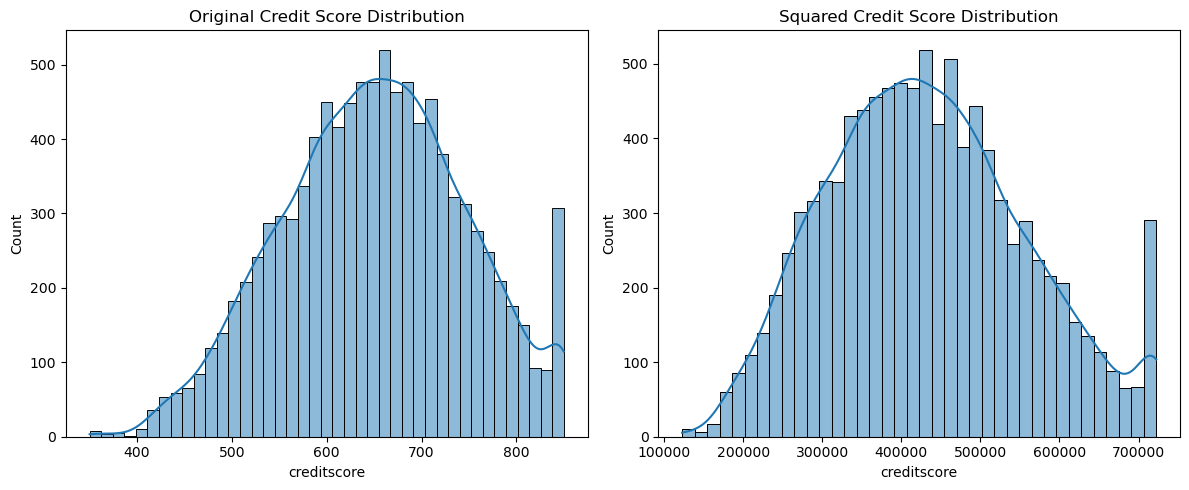

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['creditscore'], kde=True, ax=axes[0])
axes[0].set_title('Original Credit Score Distribution')

sns.histplot((df['creditscore'])**2, kde=True, ax=axes[1])
axes[1].set_title('Squared Credit Score Distribution')

plt.tight_layout()
plt.show()

The credit score distribution is roughly normal, except for a jump on the right side. Since scores range from 0 to 850, there seems to be a significant number of people with a score of 850.

In [24]:
df_no_cs850 = df[df['creditscore']!=850].copy()
df_cs850 = df[df['creditscore']==850].copy()

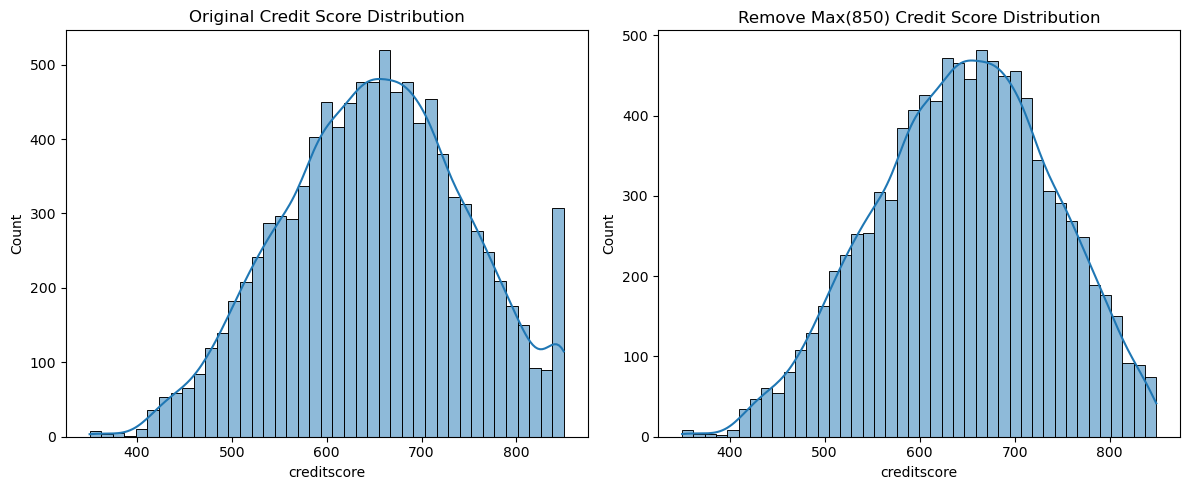

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['creditscore'], kde=True, ax=axes[0])
axes[0].set_title('Original Credit Score Distribution')

sns.histplot((df_no_cs850['creditscore']), kde=True, ax=axes[1])
axes[1].set_title('Remove Max(850) Credit Score Distribution')

plt.tight_layout()
plt.show()

In [26]:
from scipy import stats

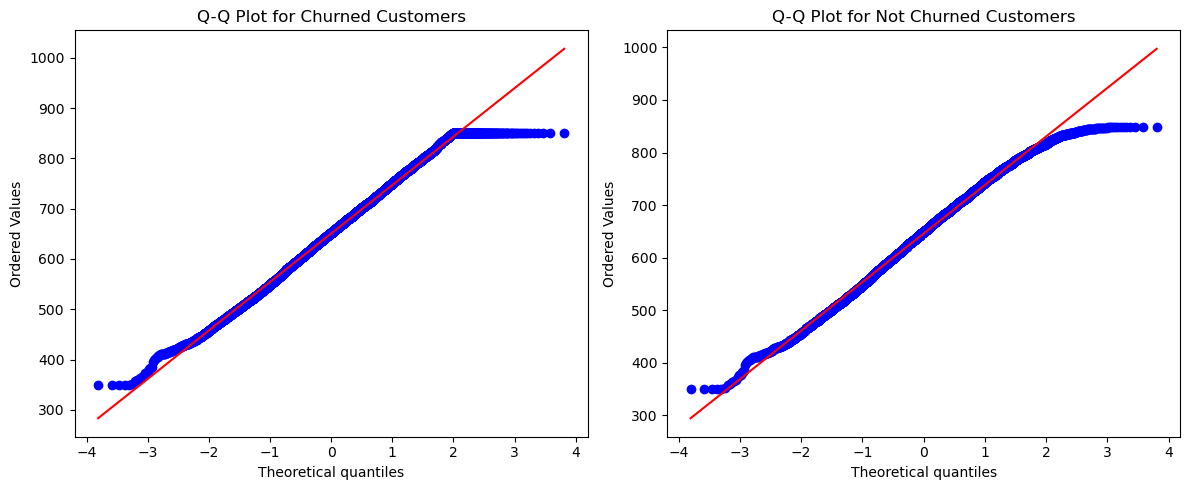

In [27]:
# Visualize with Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(df['creditscore'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Churned Customers')

plt.subplot(1, 2, 2)
stats.probplot(df_no_cs850['creditscore'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Not Churned Customers')

plt.tight_layout()
plt.show()

I attempted to remove the frequent value of 850 in the dataset to see if it would lead to a more normal distribution, but the result didn't show much difference.

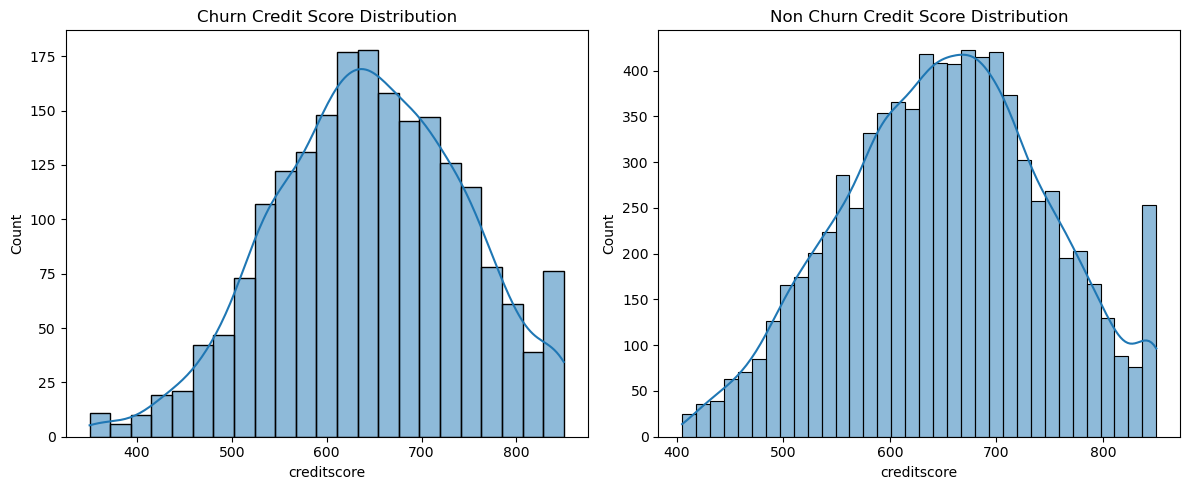

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_churn['creditscore'], kde=True, ax=axes[0])
axes[0].set_title('Churn Credit Score Distribution')

sns.histplot((df_notchurn['creditscore']), kde=True, ax=axes[1])
axes[1].set_title('Non Churn Credit Score Distribution')

plt.tight_layout()
plt.show()

In [29]:
from scipy.stats import ttest_ind

# Calculate means
niu1, niu2 = df_churn['creditscore'].mean(), df_notchurn['creditscore'].mean()

# Perform an independent t-test
t_stat, p_value = ttest_ind(df_churn['creditscore'], df_notchurn['creditscore'], equal_var=False)

# Display results
print(f"Mean creditscore for churned customers: {niu1}")
print(f"Mean creditscore for non-churned customers: {niu2}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Mean creditscore for churned customers: 645.3514972999509
Mean creditscore for non-churned customers: 651.8531960316463
T-statistic: -2.6346605436575796
P-value: 0.008464728991832862


Since the p-value is 0.0085, which is less than the typical significance level of 0.05, we can reject the null hypothesis. This indicates that there is a statistically significant difference in the mean credit scores between churned and non-churned customers. Therefore, we can conclude that the mean credit score differs between these two groups.

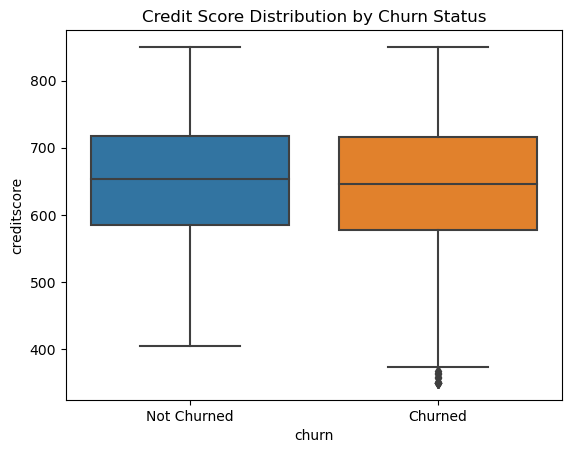

In [30]:
sns.boxplot(x='churn', y='creditscore', data=df)
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.title('Credit Score Distribution by Churn Status')
plt.show()

Even though the hypothesis test shows statistical significance, the dist plot and boxplot appear quite similar. However, upon closer inspection, we can see that churned customers have more extreme values in the lower range, with numerous outliers in that part of the distribution. On the other hand, non-churned customers have more values around 850.

In [31]:
df_notchurn['creditscore'].min()

405

In [32]:
len(df_churn[df_churn['creditscore']<405])

21

It's noticeable that all customers with a credit score below 405 have churned.

#### Age

<Axes: xlabel='age', ylabel='Count'>

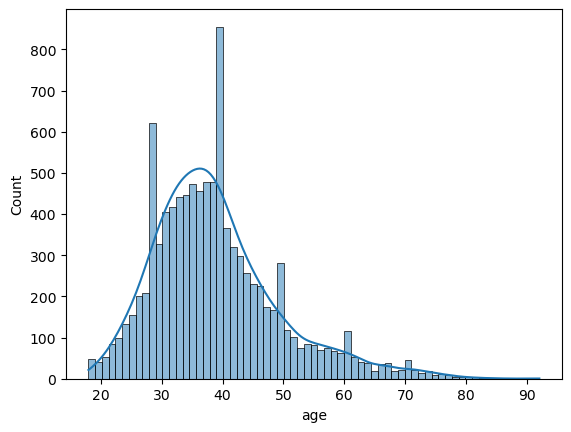

In [33]:
sns.histplot(df['age'], kde=True)

The distribution of age appears to be right-skewed.

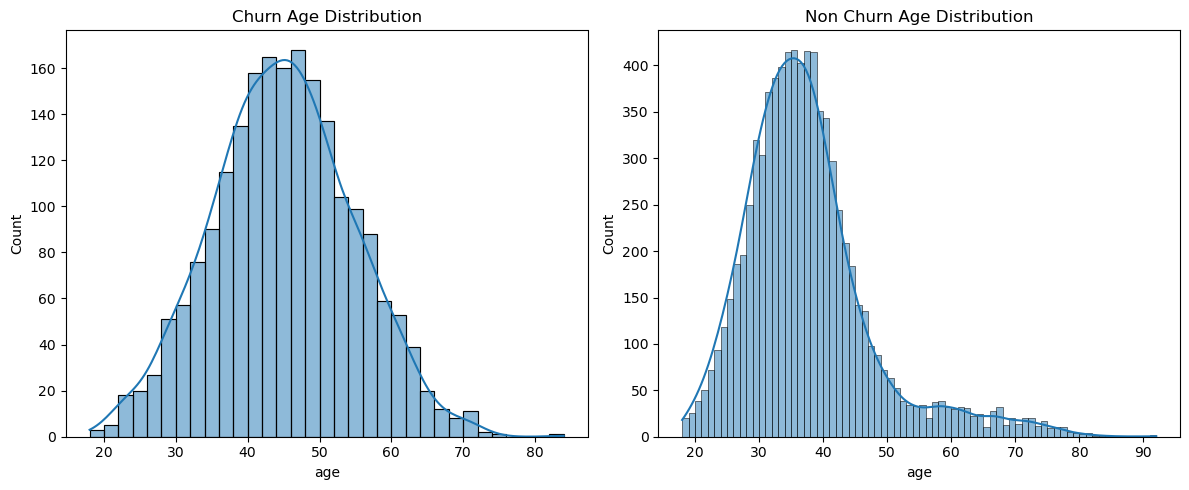

In [34]:
df_churn = df[df['churn']==1].copy()
df_notchurn = df[df['churn']==0].copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_churn['age'], kde=True, ax=axes[0])
axes[0].set_title('Churn Age Distribution')

sns.histplot((df_notchurn['age']), kde=True, ax=axes[1])
axes[1].set_title('Non Churn Age Distribution')

plt.tight_layout()
plt.show()

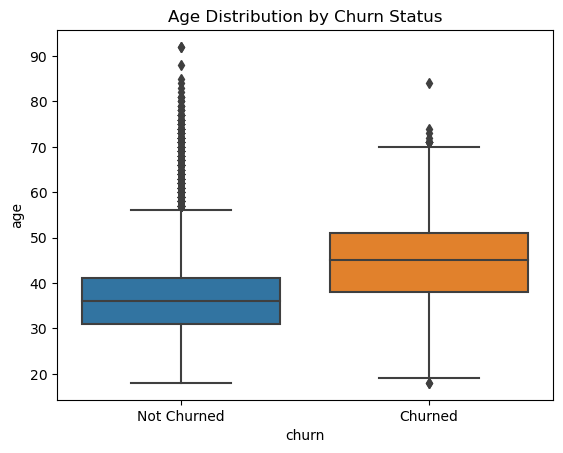

In [35]:
# Visualization (optional)
sns.boxplot(x='churn', y='age', data=df)
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.title('Age Distribution by Churn Status')
plt.show()

When examining the histogram, we observe that the churn group is approximately normally distributed, while the non-churn group exhibits a right skew. Similarly, the boxplot shows that the median for the churn group is higher, but the non-churn group has many outliers. To address this, we plan to transform the data to make it more normally distributed.

In [36]:
df['age_log'] = ((df['age']))**0.2
df['age_boxcox'], lambda_value = stats.boxcox(df['age'])

We have two potential transformations to apply here: the log transformation and the Box-Cox transformation. Both seem to work well in improving the distribution.

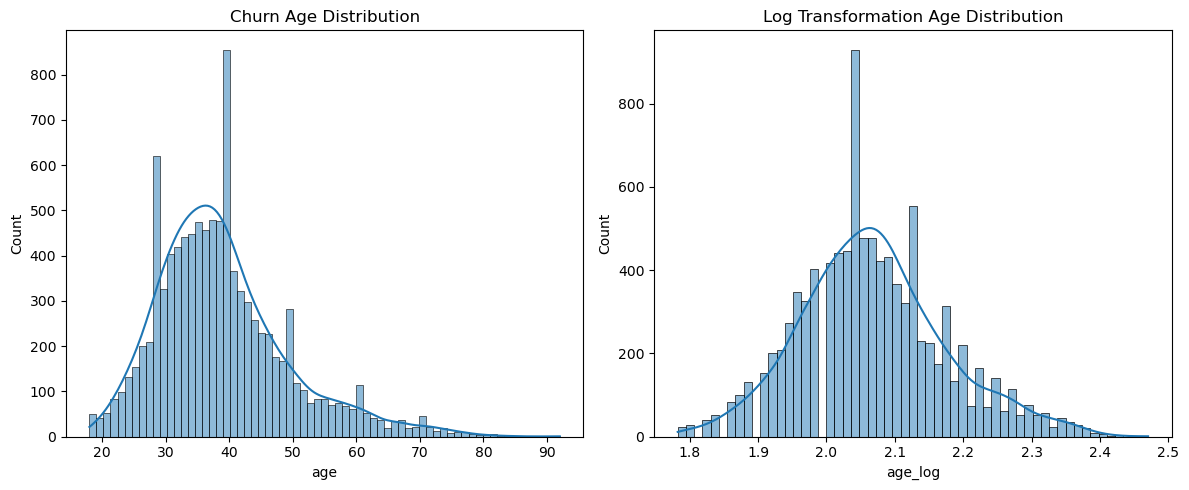

In [37]:
df_churn = df[df['churn']==1].copy()
df_notchurn = df[df['churn']==0].copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Churn Age Distribution')

sns.histplot((df['age_log']), kde=True, ax=axes[1])
axes[1].set_title('Log Transformation Age Distribution')

plt.tight_layout()
plt.show()

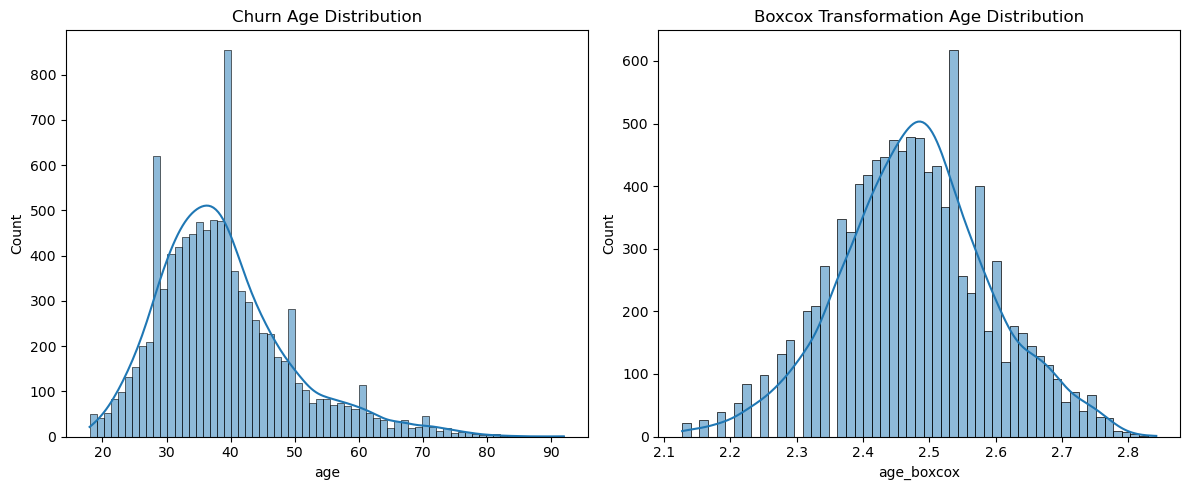

In [38]:
df_churn = df[df['churn']==1].copy()
df_notchurn = df[df['churn']==0].copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Churn Age Distribution')

sns.histplot((df['age_boxcox']), kde=True, ax=axes[1])
axes[1].set_title('Boxcox Transformation Age Distribution')

plt.tight_layout()
plt.show()

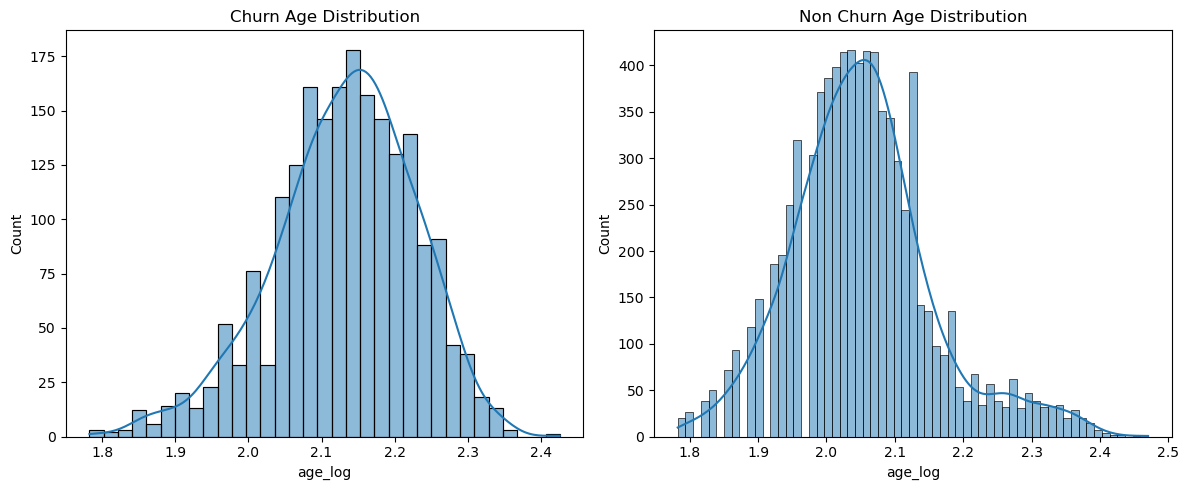

In [39]:
df_churn = df[df['churn']==1].copy()
df_notchurn = df[df['churn']==0].copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_churn['age_log'], kde=True, ax=axes[0])
axes[0].set_title('Churn Age Distribution')

sns.histplot((df_notchurn['age_log']), kde=True, ax=axes[1])
axes[1].set_title('Non Churn Age Distribution')

plt.tight_layout()
plt.show()

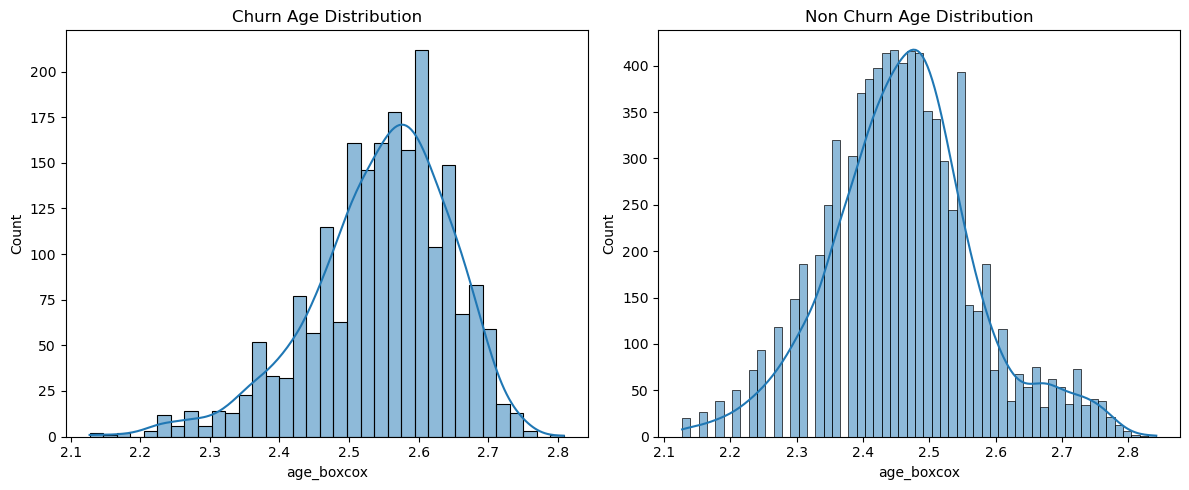

In [40]:
df_churn = df[df['churn']==1].copy()
df_notchurn = df[df['churn']==0].copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_churn['age_boxcox'], kde=True, ax=axes[0])
axes[0].set_title('Churn Age Distribution')

sns.histplot((df_notchurn['age_boxcox']), kde=True, ax=axes[1])
axes[1].set_title('Non Churn Age Distribution')

plt.tight_layout()
plt.show()

In [41]:
from scipy.stats import ttest_ind

# Calculate means
niu1, niu2 = df_churn['age_log'].mean(), df_notchurn['age_log'].mean()

# Perform an independent t-test
t_stat, p_value = ttest_ind(df_churn['age_log'], df_notchurn['age_log'], equal_var=False)

# Display results
print(f"Mean age_log for churned customers: {niu1}")
print(f"Mean age_log for non-churned customers: {niu2}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Mean age_log for churned customers: 2.131053421880978
Mean age_log for non-churned customers: 2.0526054921323893
T-statistic: 32.18062387254971
P-value: 2.9237743861297195e-198


In [42]:
from scipy.stats import ttest_ind

# Calculate means
niu1, niu2 = df_churn['age_boxcox'].mean(), df_notchurn['age_boxcox'].mean()

# Perform an independent t-test
t_stat, p_value = ttest_ind(df_churn['age_boxcox'], df_notchurn['age_boxcox'], equal_var=False)

# Display results
print(f"Mean age_log for churned customers: {niu1}")
print(f"Mean age_log for non-churned customers: {niu2}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Mean age_log for churned customers: 2.545620161466325
Mean age_log for non-churned customers: 2.4624136472955063
T-statistic: 32.692625242662025
P-value: 2.0234211887185317e-204


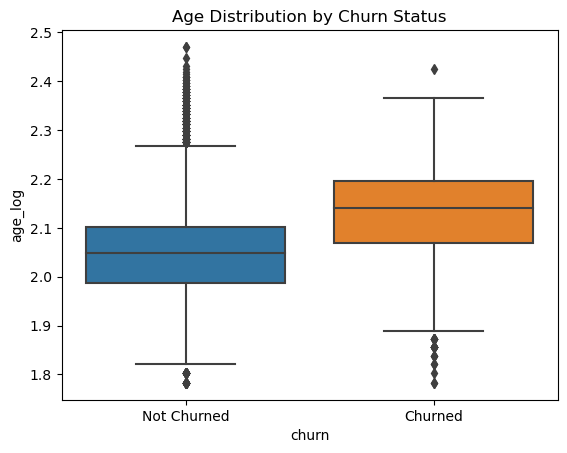

In [43]:
sns.boxplot(x='churn', y='age_log', data=df)
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.title('Age Distribution by Churn Status')
plt.show()

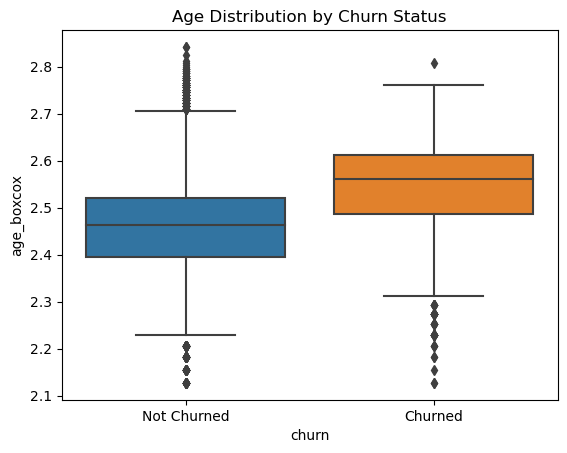

In [44]:
sns.boxplot(x='churn', y='age_boxcox', data=df)
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.title('Age Distribution by Churn Status')
plt.show()

#### Balance

<Axes: xlabel='balance', ylabel='Count'>

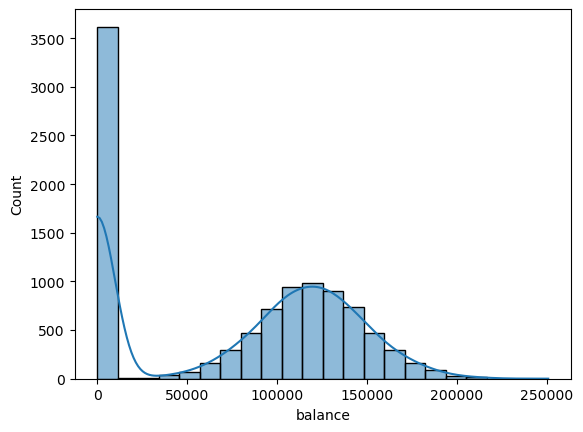

In [45]:
sns.histplot(df['balance'], kde=True)

In the balance histogram, we can observe a normal distribution once we remove the 0 values, as there are many customers with a balance of 0.

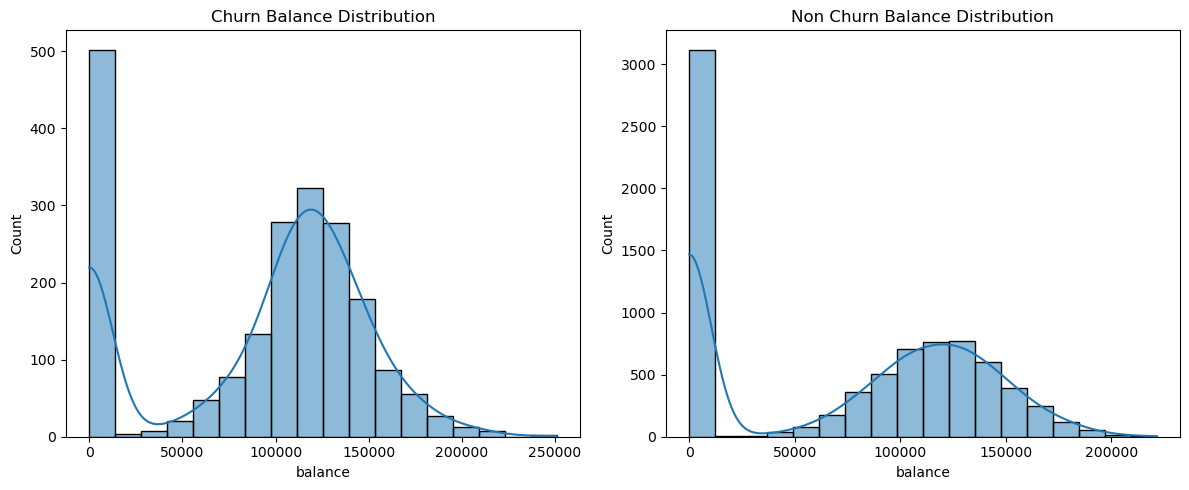

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_churn['balance'], kde=True, ax=axes[0])
axes[0].set_title('Churn Balance Distribution')

sns.histplot((df_notchurn['balance']), kde=True, ax=axes[1])
axes[1].set_title('Non Churn Balance Distribution')

plt.tight_layout()
plt.show()

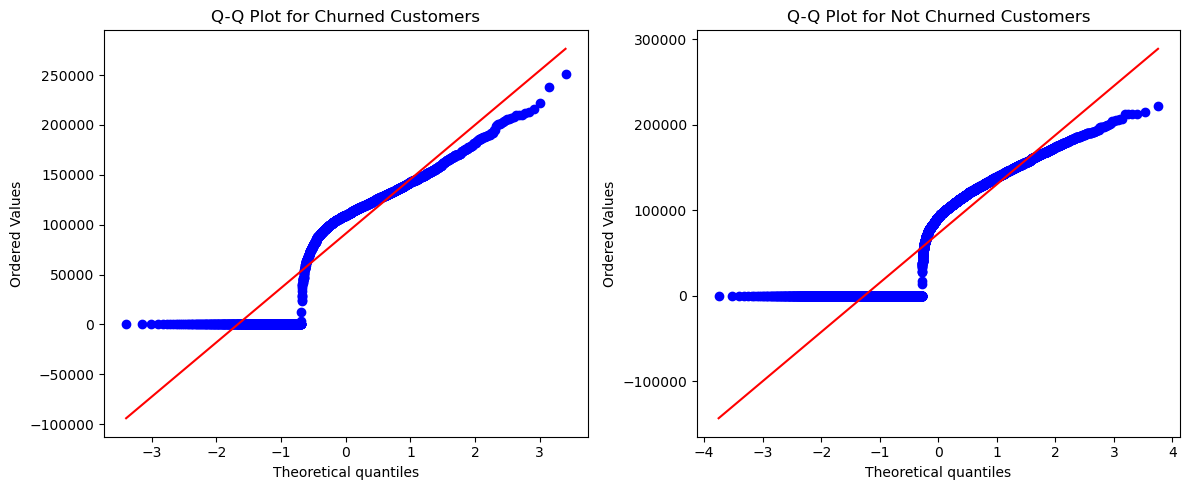

In [47]:
# Visualize with Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(df_churn['balance'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Churned Customers')

plt.subplot(1, 2, 2)
stats.probplot(df_notchurn['balance'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Not Churned Customers')

plt.tight_layout()
plt.show()

If we remove the 0 values from the data, the distribution becomes nearly normal, and the QQ plot shows that the points fall closely along the straight line, indicating normality. Interestingly, when we test for significance with the 0 values included, the result shows a significant difference. However, after removing the 0 values, the test shows no significance, meaning the distribution of balance between churned and non-churned customers is practically the same. The observed difference is primarily due to the proportion of 0 values in the data.

In [48]:
df_balance_not0 = df[df['balance']!=0].copy()
df_balance_0 = df[df['balance']==0].copy()

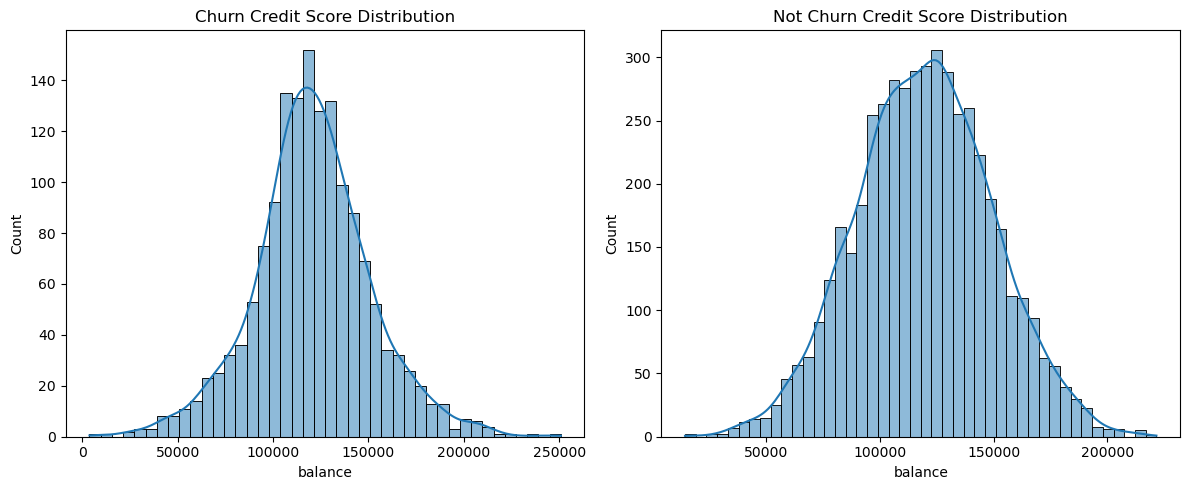

In [51]:
df_churn_balance_not0 = df_balance_not0[df_balance_not0['churn']==1].copy()
df_notchurn_balance_not0 = df_balance_not0[df_balance_not0['churn']==0].copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_churn_balance_not0['balance'], kde=True, ax=axes[0])
axes[0].set_title('Churn Credit Score Distribution')

sns.histplot((df_notchurn_balance_not0['balance']), kde=True, ax=axes[1])
axes[1].set_title('Not Churn Credit Score Distribution')

plt.tight_layout()
plt.show()

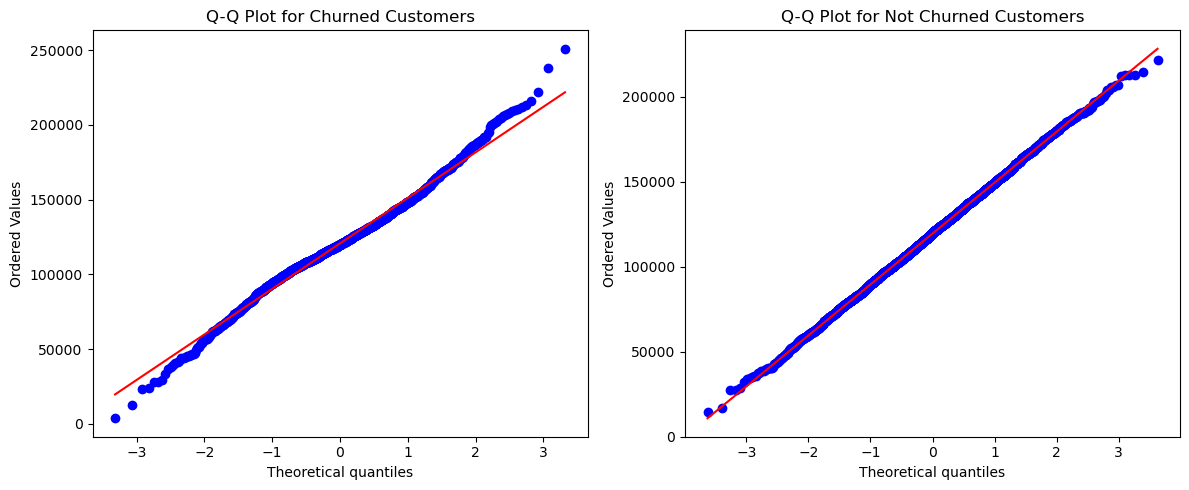

In [52]:
# Visualize with Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(df_churn_balance_not0['balance'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Churned Customers')

plt.subplot(1, 2, 2)
stats.probplot(df_notchurn_balance_not0['balance'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Not Churned Customers')

plt.tight_layout()
plt.show()

In [53]:
from scipy.stats import ttest_ind

# Calculate means
niu1, niu2 = df_churn['balance'].mean(), df_notchurn['balance'].mean()

# Perform an independent t-test
t_stat, p_value = ttest_ind(df_churn['balance'], df_notchurn['balance'], equal_var=False)

# Display results
print(f"Mean creditscore for churned customers: {niu1}")
print(f"Mean creditscore for non-churned customers: {niu2}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Mean creditscore for churned customers: 91108.53933726068
Mean creditscore for non-churned customers: 72745.2967788522
T-statistic: 12.471280320050688
P-value: 6.318663518527974e-35


In [54]:
from scipy.stats import ttest_ind

# Calculate means
niu1, niu2 = df_churn_balance_not0['balance'].mean(), df_notchurn_balance_not0['balance'].mean()

# Perform an independent t-test
t_stat, p_value = ttest_ind(df_churn_balance_not0['balance'], df_notchurn_balance_not0['balance'], equal_var=False)

# Display results
print(f"Mean creditscore for churned customers: {niu1}")
print(f"Mean creditscore for non-churned customers: {niu2}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Mean creditscore for churned customers: 120746.97113207547
Mean creditscore for non-churned customers: 119535.86426950061
T-statistic: 1.3604774889985365
P-value: 0.17379960354870824


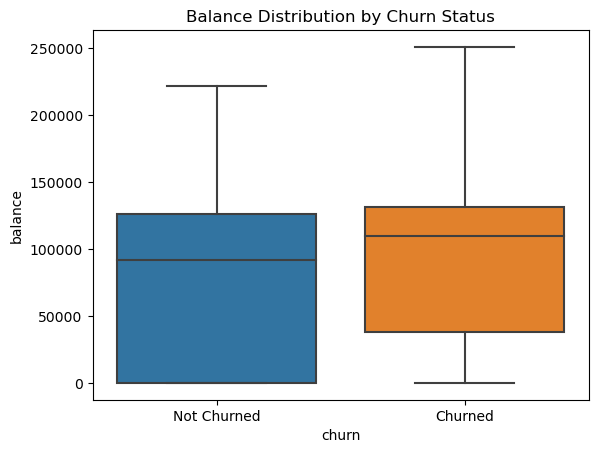

In [55]:
# Visualization (optional)
sns.boxplot(x='churn', y='balance', data=df)
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.title('Balance Distribution by Churn Status')
plt.show()

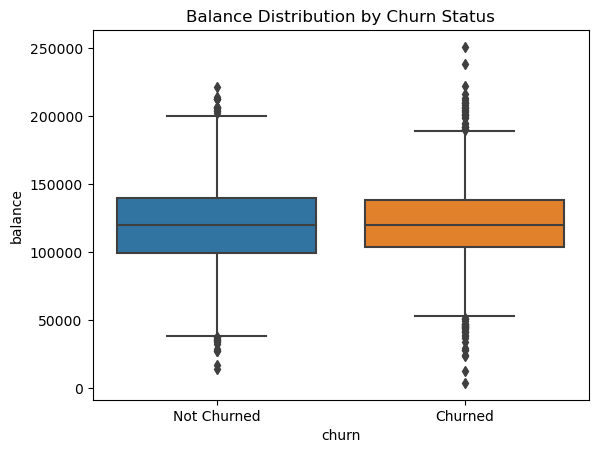

In [56]:
# Visualization (optional)
sns.boxplot(x='churn', y='balance', data=df_balance_not0)
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.title('Balance Distribution by Churn Status')
plt.show()

I think it would be interesting to explore the pattern behind customers who haven't churned but still have a 0 balance.

#### Estimated Salary

<Axes: xlabel='estimatedsalary', ylabel='Count'>

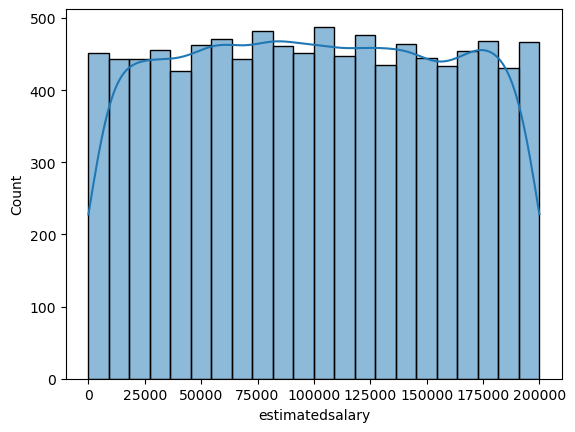

In [57]:
sns.histplot(df['estimatedsalary'], kde=True)

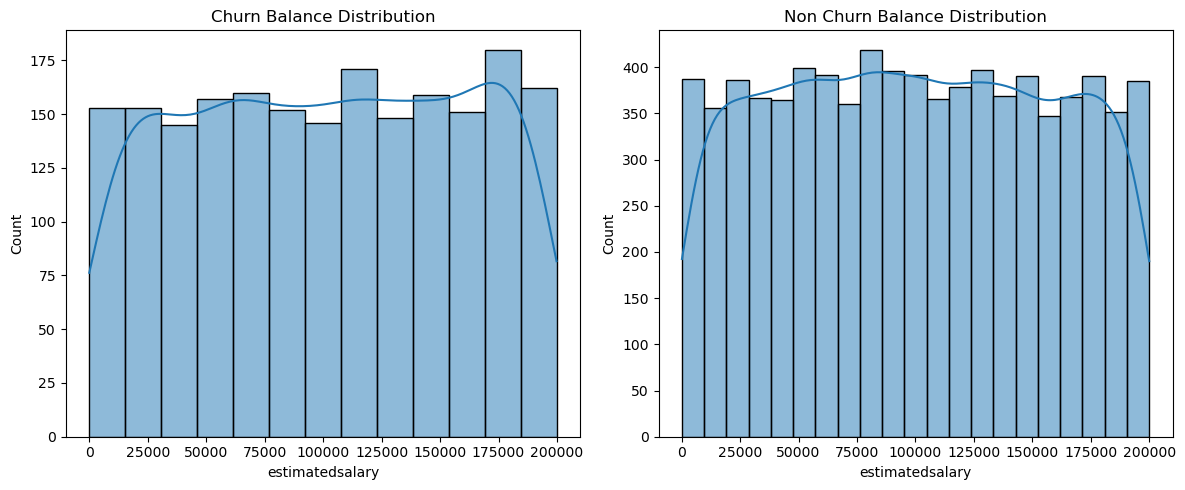

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_churn['estimatedsalary'], kde=True, ax=axes[0])
axes[0].set_title('Churn Balance Distribution')

sns.histplot((df_notchurn['estimatedsalary']), kde=True, ax=axes[1])
axes[1].set_title('Non Churn Balance Distribution')

plt.tight_layout()
plt.show()

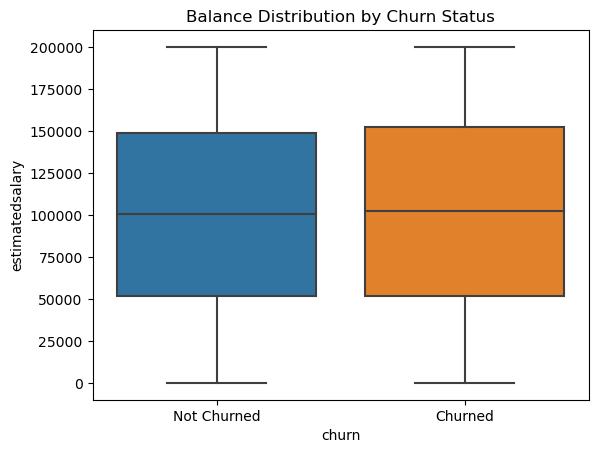

In [59]:
# Visualization (optional)
sns.boxplot(x='churn', y='estimatedsalary', data=df_balance_not0)
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.title('Balance Distribution by Churn Status')
plt.show()

#### Tenure

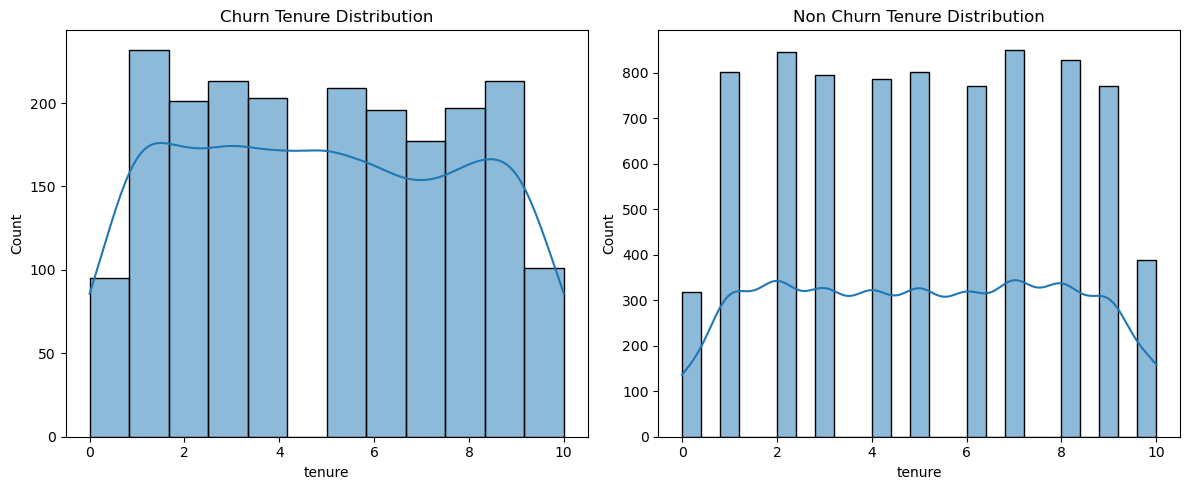

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_churn['tenure'], kde=True, ax=axes[0])
axes[0].set_title('Churn Tenure Distribution')

sns.histplot((df_notchurn['tenure']), kde=True, ax=axes[1])
axes[1].set_title('Non Churn Tenure Distribution')

plt.tight_layout()
plt.show()

In [61]:
from scipy.stats import ttest_ind

# Calculate means
niu1, niu2 = df_churn['tenure'].mean(), df_notchurn['tenure'].mean()

# Perform an independent t-test
t_stat, p_value = ttest_ind(df_churn['tenure'], df_notchurn['tenure'], equal_var=False)

# Display results
print(f"Mean creditscore for churned customers: {niu1}")
print(f"Mean creditscore for non-churned customers: {niu2}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Mean creditscore for churned customers: 4.932744231713304
Mean creditscore for non-churned customers: 5.033278914981791
T-statistic: -1.384328819131246
P-value: 0.16635698992884443


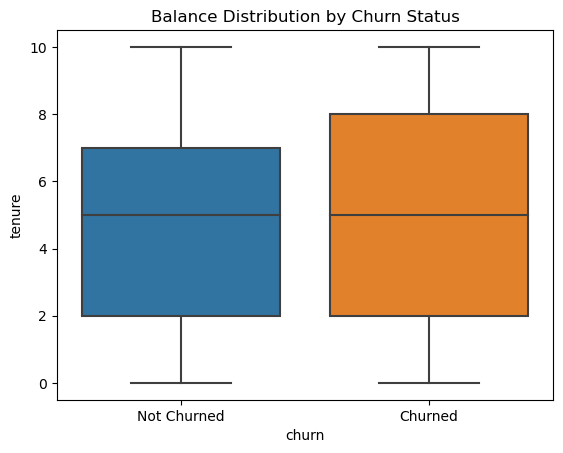

In [62]:
# Visualization (optional)
sns.boxplot(x='churn', y='tenure', data=df_balance_not0)
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.title('Balance Distribution by Churn Status')
plt.show()

Initially, I assumed that older customers would be more loyal and have lower churn, but in reality, the distribution of tenure between churned and non-churned customers is quite similar. It would be interesting to explore how tenure interacts with other features to identify patterns related to churn.

#### Gender

In [63]:
df[df['gender']=='Male']['churn'].mean(), df[df['gender']=='Female']['churn'].mean()

(0.16455928165658787, 0.2507153863086066)

In [64]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create the contingency table
contingency_table = pd.crosstab(df['gender'], df['churn'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Contingency Table:
churn      0     1
gender            
Female  3404  1139
Male    4559   898
Chi-square statistic: 112.91857062096116
P-value: 2.2482100097131755e-26
Degrees of freedom: 1
Expected frequencies:
[[3617.5909  925.4091]
 [4345.4091 1111.5909]]


The Chi-square test shows a statistically significant result with a p-value of 2.25e-26, indicating that gender and churn are related. Specifically, females appear to have a higher churn rate compared to males.

#### Geography

In [65]:
df[df['geography']=='Spain']['churn'].mean(),df[df['geography']=='France']['churn'].mean(),df[df['geography']=='Germany']['churn'].mean()

(0.1667339523617279, 0.16154766653370561, 0.32443204463929853)

In [66]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create the contingency table
contingency_table = pd.crosstab(df['geography'], df['churn'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Contingency Table:
churn         0    1
geography           
France     4204  810
Germany    1695  814
Spain      2064  413
Chi-square statistic: 301.25533682434536
P-value: 3.8303176053541544e-66
Degrees of freedom: 2
Expected frequencies:
[[3992.6482 1021.3518]
 [1997.9167  511.0833]
 [1972.4351  504.5649]]


The Chi-square test shows a statistically significant result with a p-value of 3.83e-66, indicating that geography and churn are related. Notably, a large proportion of customers from Germany seem to churn compared to those from France and Spain.

#### Num of Products

In [67]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create the contingency table
contingency_table = pd.crosstab(df['numofproducts'], df['churn'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Contingency Table:
churn             0     1
numofproducts            
1              3675  1409
2              4242   348
3                46   220
4                 0    60
Chi-square statistic: 1503.6293615070408
P-value: 0.0
Degrees of freedom: 3
Expected frequencies:
[[4048.3892 1035.6108]
 [3655.017   934.983 ]
 [ 211.8158   54.1842]
 [  47.778    12.222 ]]


The Chi-square test shows a statistically significant result with a p-value of 0.0, indicating an association between the number of products and churn. Customers with 3 or 4 products appear to have a notably higher churn rate compared to those with 1 or 2 products.

#### Has Credit Card

In [68]:
df[df['hascrcard']==1]['churn'].mean(),df[df['hascrcard']==0]['churn'].mean()

(0.20184266477675408, 0.20814940577249574)

In [69]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create the contingency table
contingency_table = pd.crosstab(df['hascrcard'], df['churn'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Contingency Table:
churn         0     1
hascrcard            
0          2332   613
1          5631  1424
Chi-square statistic: 0.47133779904440803
P-value: 0.49237236141554686
Degrees of freedom: 1
Expected frequencies:
[[2345.1035  599.8965]
 [5617.8965 1437.1035]]


The Chi-square test result, with a p-value of 0.492, indicates that there is no statistically significant relationship between having a credit card and churn.

#### Is Active Member

In [70]:
df[df['isactivemember']==1]['churn'].mean()

0.14269073966220153

In [71]:
df[df['isactivemember']==0]['churn'].mean()

0.26850897092183956

In [72]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Create the contingency table
contingency_table = pd.crosstab(df['isactivemember'], df['churn'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Contingency Table:
churn              0     1
isactivemember            
0               3547  1302
1               4416   735
Chi-square statistic: 242.98534164287963
P-value: 8.785858269303703e-55
Degrees of freedom: 1
Expected frequencies:
[[3861.2587  987.7413]
 [4101.7413 1049.2587]]


The Chi-square test shows a statistically significant result with a p-value of 8.79e-55, indicating a strong association between being an active member and churn.

In [73]:
df[df['balance']==0]['churn'].mean()

0.13823610727121924

# Data Preparation

In [74]:
# Feature Engineering
df['islow_creditscore'] = df['creditscore']<405
df['numofproducts_4'] = df['numofproducts']==4
df['numofproducts_3'] = (df['numofproducts']==3) & (df['balance']!=0)
df['age_midage'] =(df['age']>=40) & (df['age']<=70)
df['german_nomember'] = (df['geography']=='Germany') &(df['isactivemember']==0)
df['balance_0'] = df['balance']==0


In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [76]:
from sklearn.model_selection import train_test_split

# Split the data first
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_fullval, y_train, y_fullval = train_test_split(X,y,random_state=44,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_fullval,y_fullval, random_state=44,test_size=0.5)

In [77]:
# Reset the index for each DataFrame
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Verify the shapes of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (7000, 18) (7000,)
Validation set: (1500, 18) (1500,)
Test set: (1500, 18) (1500,)


We aim to prepare the data by scaling all numeric columns and one-hot encoding categorical columns. This process will be integrated into a single pipeline.

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score

def evaluate_model(model, X_train, y_train, X_val, y_val, beta=1.5):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on training and validation data
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Compute metrics for training data
    train_fbeta = fbeta_score(y_train, y_train_pred, beta=beta)
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    
    # Compute metrics for validation data
    val_fbeta = fbeta_score(y_val, y_val_pred, beta=beta)
    val_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    
    # Display the results
    print(f"Training F-beta (beta={beta}): {train_fbeta:.4f}")
    print(f"Training ROC AUC: {train_auc:.4f}")
    print(f"Validation F-beta (beta={beta}): {val_fbeta:.4f}")
    print(f"Validation ROC AUC: {val_auc:.4f}")


# Modeling & Evaluation

### Evaluation Metrics Selection for Churn Prediction

#### 1. ROC AUC Score

**Reason for Selection:**
- **Threshold Independence:** Evaluates model performance across all classification thresholds.
- **True Positive and False Positive Rates:** Considers both recall and the false positive rate.
- **Probability Scores:** Measures the ranking quality of predicted probabilities.

**Suitability for Churn Prediction:**
- **Business Impact:** High ROC AUC ensures effective distinction between churn and non-churn customers.
- **Decision-Making:** Allows selection of optimal threshold balancing false positives and false negatives.

#### 2. F-beta Score (F1.5 Score)

**Reason for Selection:**
- **Imbalanced Data:** Accuracy is misleading for imbalanced datasets.
- **Recall Emphasis:** Identifying all churning customers is crucial.
- **Precision Consideration:** Reducing false positives is still important.

**F1.5 Score:**
- A weighted harmonic mean of precision and recall, with more emphasis on recall.



In [87]:
from sklearn.linear_model import LogisticRegression

# Define the columns
numerical = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary', 'numofproducts',
             'hascrcard', 'isactivemember']
categorical = ['geography', 'gender']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])



In [88]:
evaluate_model(pipeline, X_train, y_train, X_val, y_val, beta=1.5)

Training F-beta (beta=1.5): 0.2690
Training ROC AUC: 0.7685
Validation F-beta (beta=1.5): 0.2601
Validation ROC AUC: 0.7630


When we modeled and predicted churn using logistic regression, the F-beta score was quite low at around 0.26, and the ROC AUC was approximately 0.76. We plan to improve this model by incorporating the engineered features we have created.

In [89]:
from imblearn.pipeline import Pipeline as ImbPipeline 
from imblearn.over_sampling import SMOTE  

# Define the pipeline with SMOTE and logistic regression
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE for balancing
    ('classifier', LogisticRegression())
])

In [90]:
evaluate_model(pipeline, X_train, y_train, X_val, y_val, beta=1.5)

Training F-beta (beta=1.5): 0.5604
Training ROC AUC: 0.7716
Validation F-beta (beta=1.5): 0.5456
Validation ROC AUC: 0.7660


Applying SMOTE to the logistic regression model led to a significant improvement in the F-beta score. Initially, the model had a Training F-beta (beta=1.5) of 0.5604 and Validation F-beta of 0.5456, which both increased markedly after using SMOTE, while the ROC AUC scores (Training: 0.7716, Validation: 0.7660) remained relatively stable.

In [108]:
from sklearn.linear_model import LogisticRegression


numerical = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary', 'numofproducts',
             'hascrcard', 'isactivemember','islow_creditscore','numofproducts_4','numofproducts_3','age_midage',
            'german_nomember','balance_0']
categorical = ['geography', 'gender']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ])

# Define the pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE for balancing
    ('classifier', LogisticRegression())
])



In [109]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['creditscore', 'age',
                                                   'tenure', 'balance',
                                                   'estimatedsalary',
                                                   'numofproducts', 'hascrcard',
                                                   'isactivemember',
                                                   'islow_creditscore',
                                                   'numofproducts_4',
                                                   'numofproducts_3',
                                                   'age_midage',
                                                   'german_nomember',
                                                   'balance_0']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['geography', 'gender'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

In [97]:
evaluate_model(pipeline, X_train, y_train, X_val, y_val, beta=1.5)

Training F-beta (beta=1.5): 0.6136
Training ROC AUC: 0.8270
Validation F-beta (beta=1.5): 0.6142
Validation ROC AUC: 0.8148


After applying feature engineering, the model showed slight improvement, with the F-beta score increasing to around 0.61 and the ROC AUC rising to 0.81.

In [99]:
from sklearn.ensemble import RandomForestClassifier

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Apply SMOTE for balancing
    ('classifier', RandomForestClassifier())
])

evaluate_model(pipeline, X_train, y_train, X_val, y_val, beta=1.5)

Training F-beta (beta=1.5): 1.0000
Training ROC AUC: 1.0000
Validation F-beta (beta=1.5): 0.5872
Validation ROC AUC: 0.8420


Interestingly, when using logistic regression, the model achieved a training F-beta score of around 0.61 and a ROC AUC of approximately 0.81. However, with the random forest model, training scores were maxed out at 1, while the validation set yielded an F-beta of 0.58 and a ROC AUC of 0.84. Next, let’s test a variety of different models to identify which achieves the highest ROC AUC score on the validation set.

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, roc_auc_score

# List of classifiers to evaluate
models = [
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('SVM', SVC(probability=True)),  # SVC needs probability=True for AUC scoring
    ('LogisticRegression', LogisticRegression())
]

results = []

# Loop through each model
for name, model in models:
    # Define the pipeline with the current model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),  # Assuming preprocessor is already defined
        ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
        ('classifier', model)
    ])
    
    scoring=make_scorer(fbeta_score, beta=1.5)
    # Compute AUC score using cross-validation
    auc_scores = cross_val_score(pipeline, X, y, cv=5, scoring=scoring)
    
    # Store the result
    results.append((name, auc_scores.mean()))  # mean AUC score

# Sort results by AUC score (highest first)
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Print out the results
for name, auc in sorted_results:
    print(f'{name}: F-Beta 1.5 = {auc:.4f}')


/home/user/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

SVM: F-Beta 1.5 = 0.6335
GradientBoosting: F-Beta 1.5 = 0.6228
AdaBoost: F-Beta 1.5 = 0.6103
LogisticRegression: F-Beta 1.5 = 0.6053
RandomForest: F-Beta 1.5 = 0.5804


From the five models tested, SVM achieved the best FBeta Score of  0.6335, followed by GradientBoosting (0.6228) and AdaBoost (0.6103). LogisticRegression and Random Forest had lower FBeta scores 6.

Given that SVM performed the best, we will proceed with hyperparameter tuning to further optimize the model and improve the FBeta Score.

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline  # Use Imbalanced-Learn's Pipeline to integrate SMOTE

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

# Define the pipeline (make sure 'preprocessor' is defined)
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is already defined
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', SVC(probability=True))  # Set probability=True to enable ROC AUC scoring
])

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring=scoring, n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X, y)

# Output the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F Beta 1.5 score: {grid_search.best_score_}")


Best parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best AUC score: 0.6335392206987784


In [133]:
best_model = grid_search.best_estimator_
evaluate_model(best_model, X_train, y_train, X_val, y_val, beta=1.5)

Training F-beta (beta=1.5): 0.6685
Training ROC AUC: 0.8775
Validation F-beta (beta=1.5): 0.6409
Validation ROC AUC: 0.8380


After performing hyperparameter tuning, the model achieved a training F-beta score (beta=1.5) of 0.6685 and a training ROC AUC of 0.8775. For the validation set, the F-beta score (beta=1.5) was 0.6409, and the ROC AUC was 0.8380.

# Final Model

In [128]:
y_test_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_test_prob >= 0.5).astype(int)

# Calculate F-beta score with beta=1.5
fbeta_1_5 = fbeta_score(y_test, y_pred, beta=1.5)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)

# Output the results
print(f"F-beta (beta=1.5): {fbeta_1_5}")
print(f"ROC AUC: {roc_auc}")

F-beta (beta=1.5): 0.6289404553415061
ROC AUC: 0.8477666666666668
